In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image


In [3]:
#读取文件
df = pd.read_csv('survey_results_public.csv')

E:\Data Analysis\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#查看基本信息并根据Respondent去重
df.info()
df_unique=df.drop_duplicates(subset='Respondent',keep='first')
len(df_unique) #98855
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


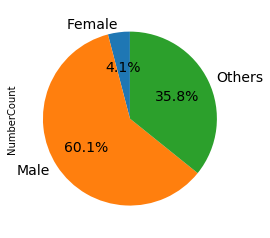

In [5]:
#用饼图展示性别比例
import matplotlib.pyplot as plt
%matplotlib inline
def GenderSort(column):
    if column == "Male" or column == "Female":
        return column
    else:
        return "Others"
df_unique['GenderSort'] = df_unique.Gender.apply(GenderSort)
df_unique['GenderSort']
dgs = df_unique.groupby(['GenderSort'],as_index=False)['GenderSort'].agg({'NumberCount':'count'})
dgs.plot(kind='pie', y = 'NumberCount',  autopct='%1.1f%%', startangle=90, shadow=False, labels=dgs['GenderSort'], legend = False, fontsize=14)

### 结论：男女比例 92：6，接近15：1.这个比例还是挺失衡的

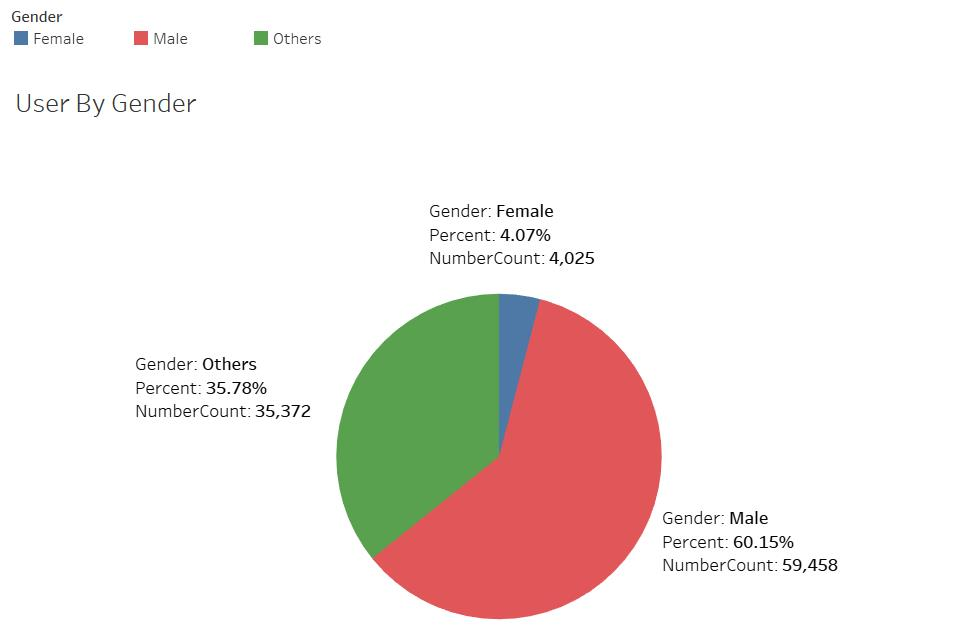

In [7]:
#把处理过的性别数据存到本地，用Tableau进行可视化
dgs.to_csv("CleanGender.csv",index=False,sep=',')
from IPython.display import Image
Image(filename="UserByGender.jpg",width=900,height=600)

E:\Data Analysis\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


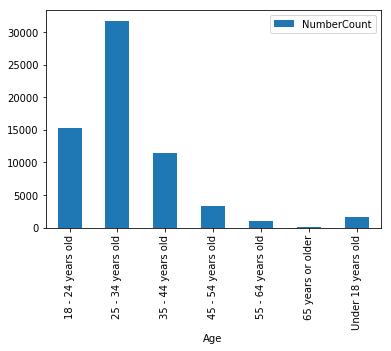

In [8]:
dfAgeCount=df_unique.groupby(['Age'],as_index=True)['Age'].agg({'NumberCount':'count'})
dfAgeCount.plot.bar()

### 结论：34岁以下占据3/4，还是比较偏壮年劳动力。
### 备注：18岁以下还有2.5%, 长江后浪拍前浪。

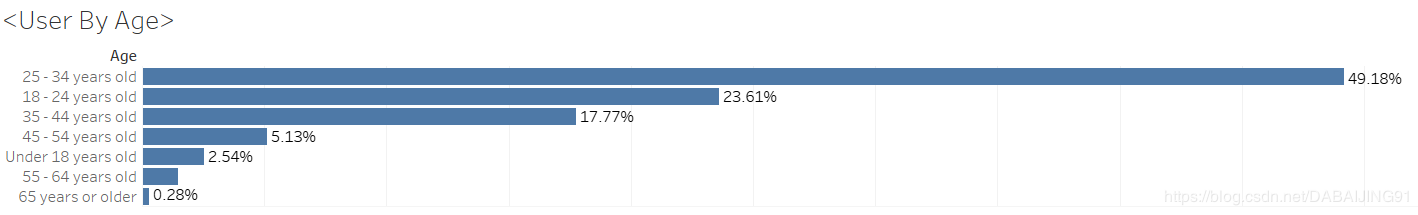

In [33]:
#Tableau可视化条形图
datatosave = pd.DataFrame(dfAgeCount)
datatosave.to_csv("CleanAge.csv",index=False,sep=',')
Image(filename="UserByAge.png",width=900,height=600)

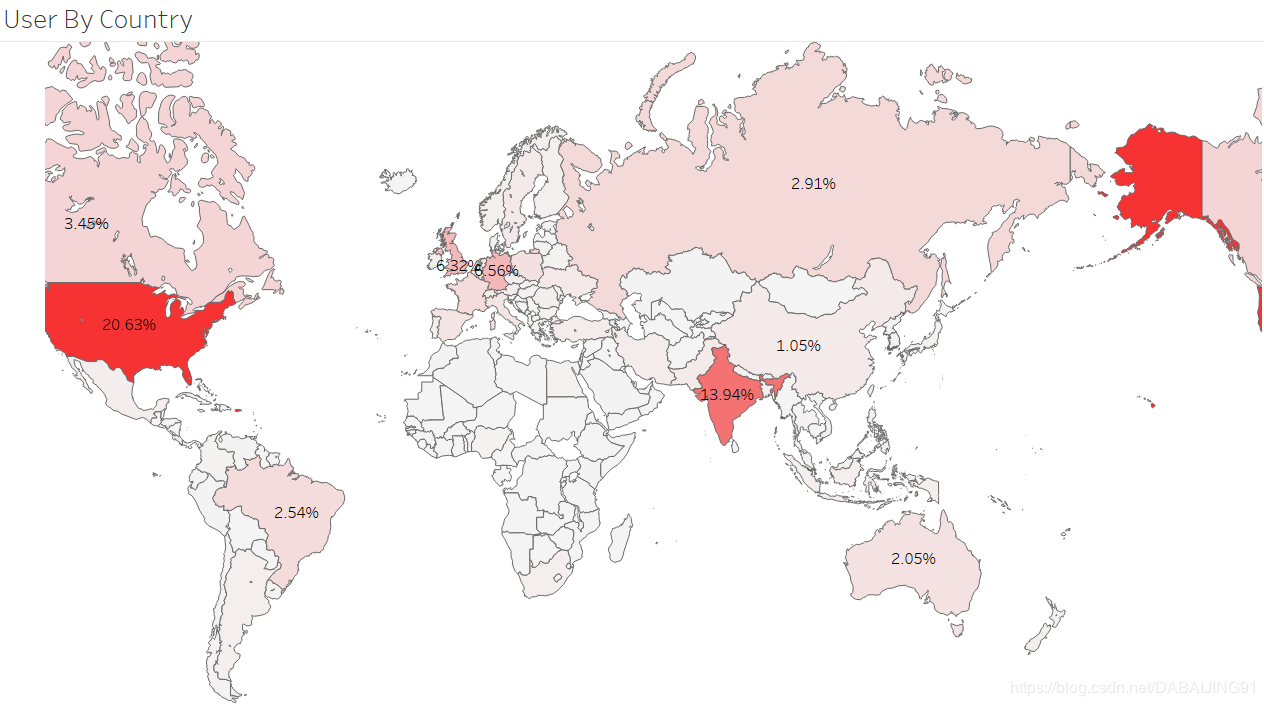

In [42]:
#Tableau可视化地图
dataCountryClean = df.Country.dropna()
dfCountry = pd.DataFrame(dataCountryClean)
dfCountryCount=dfCountry.groupby(['Country'],as_index=False)['Country'].agg({'NumberCount':'count'})
dfCountryCount
dfCountryCount.to_csv("CleanCountry.csv",index=False,sep=',')
Image(filename="UserByCountry.png",width=900,height=600)

### 结论：欧美印占据主流，中国的码农吃亏在语言上。
### 备注：也可能闷声发大财，我们就是不爱填问卷

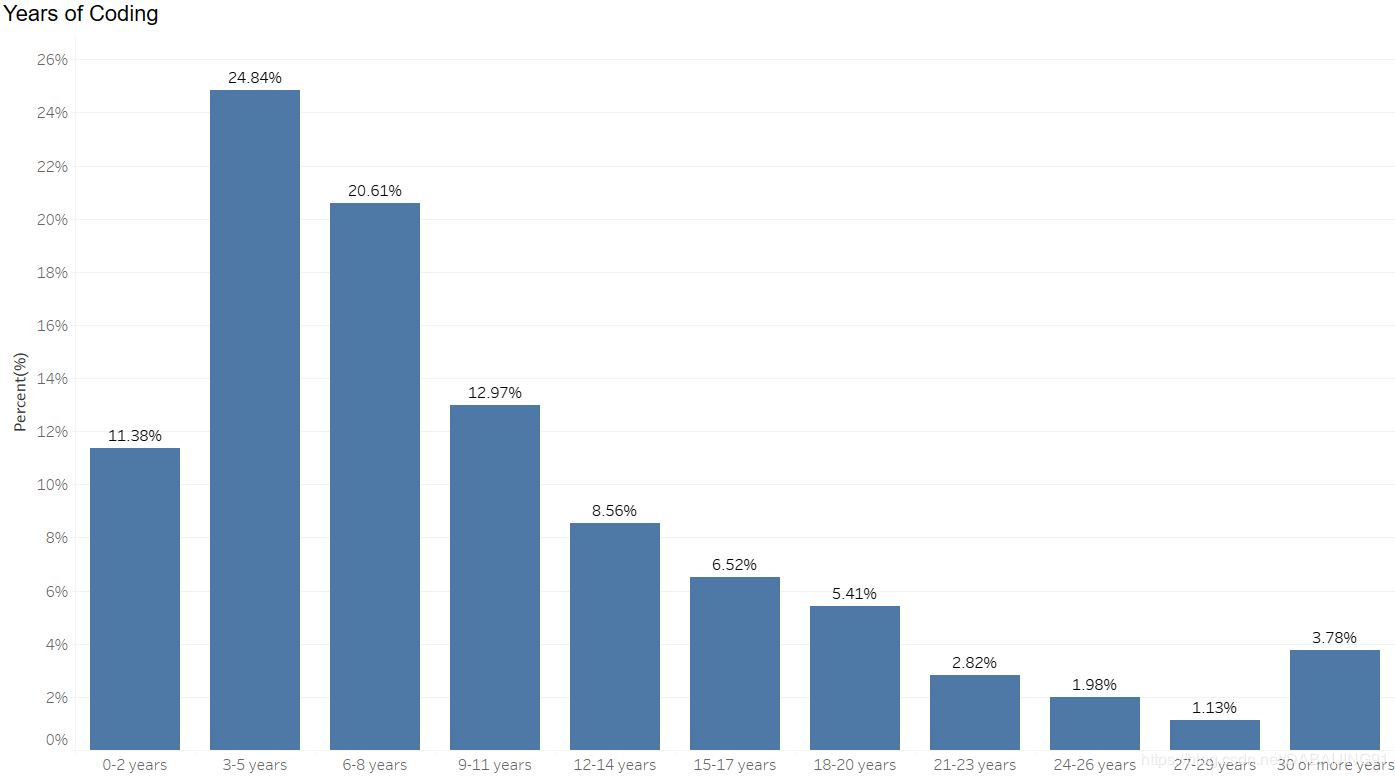

In [47]:
#data.YearsCoding
dataYearsCodingClean = df.YearsCoding.dropna()
dfYearsCoding = pd.DataFrame(dataYearsCodingClean)
dfYearsCodingCount=dfYearsCoding.groupby(['YearsCoding'],as_index=False)['YearsCoding'].agg({'NumberCount':'count'})
dfYearsCodingCount.to_csv("CleandfYearsCodingCount.csv",index=False,sep=',')
Image(filename="YearsofCoding.png",width=900,height=600)

### 结论：50%在8年以内，5年左右是个峰值，10年以上的老鸟在逐级减少。
### 备注：30年+的意思是有些老人家1989年之前就已经是程序员了，可谓扫地僧级别。

In [61]:
JobSatisfactionClean = data.JobSatisfaction.dropna()
df_JobSatisfactionClean = pandas.DataFrame(JobSatisfactionClean)
df_JobSatisfaction_Count=df_JobSatisfactionClean.groupby(['JobSatisfaction'],as_index=False)['JobSatisfaction'].agg({'NumberCount':'count'})
#datatosave = pandas.DataFrame(dfYearsCodingCount)
df_JobSatisfaction_Count.to_csv("CleanJobSatisfactionCount.csv",index=False,sep=',')

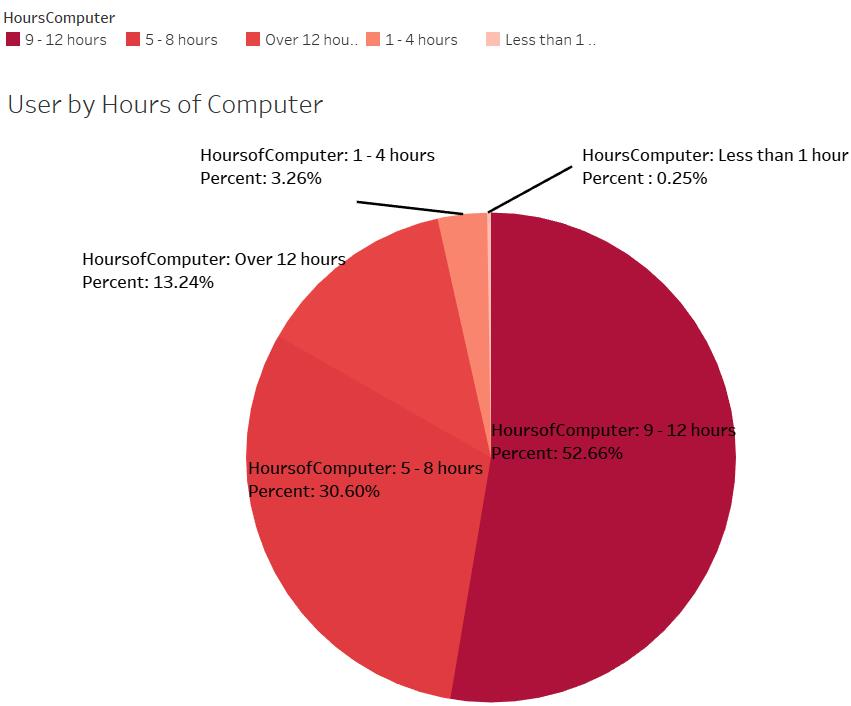

In [54]:
#data.HoursComputer
HoursComputerClean = df.HoursComputer.dropna()
df_HoursComputerClean = pd.DataFrame(HoursComputerClean)
df_HoursComputerClean_Count=df_HoursComputerClean.groupby(['HoursComputer'],as_index=False)['HoursComputer'].agg({'NumberCount':'count'})
df_HoursComputerClean_Count.to_csv("CleanHoursComputerCount.csv",index=False,sep=',')
Image(filename="UserByHours.jpg",width=540,height=360)

### 结论：工作9小时以上的有65%，不负程序猿之名。
### 备注：联系年龄图，对身体的负担主要在脑力部分。

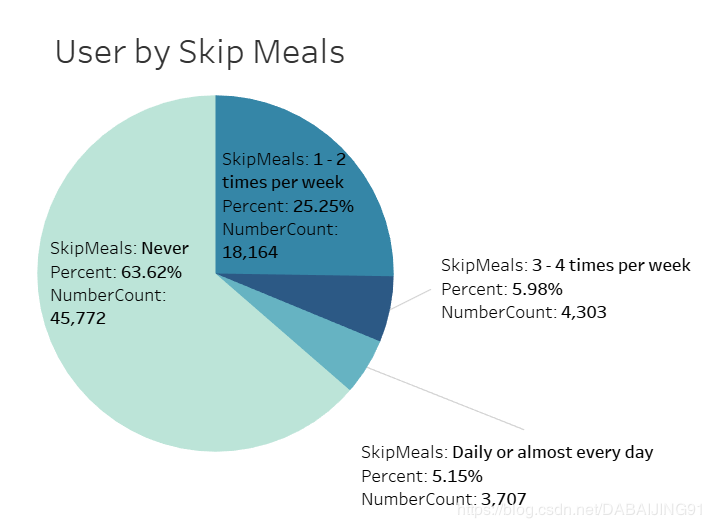

In [53]:
#data.SkipMeals
SkipMealsClean = df.SkipMeals.dropna()
df_SkipMealsClean = pd.DataFrame(SkipMealsClean)
df_SkipMealsClean_Count=df_SkipMealsClean.groupby(['SkipMeals'],as_index=False)['SkipMeals'].agg({'NumberCount':'count'})
df_SkipMealsClean_Count.to_csv("CleanSkipMealsCount.csv",index=False,sep=',')
Image(filename="UserBySkipMeals.png",width=900,height=600)

### 结论：
### 1.有40%会每周至少有1次忙的顾不上吃饭；
### 2.考虑1周工作5天的话，3-4次和每天都有的加起来就占了10%

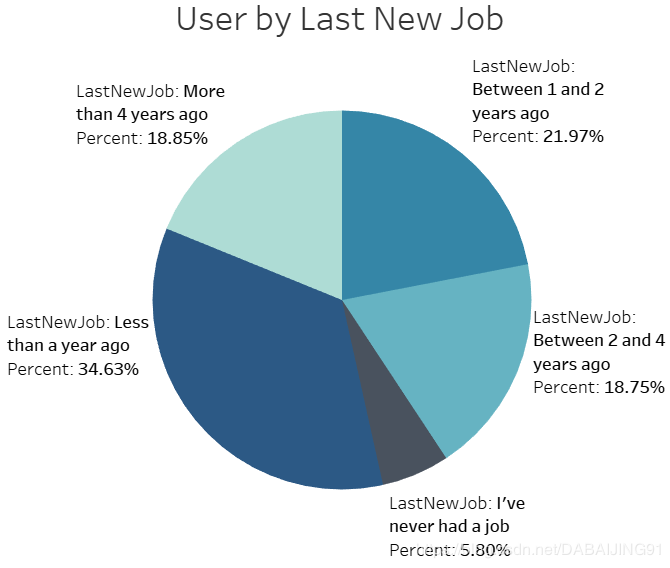

In [57]:
#data.LastNewJob
LastNewJobClean = df.LastNewJob.dropna()
df_LastNewJobClean = pd.DataFrame(LastNewJobClean)
df_LastNewJobClean_Count=df_LastNewJobClean.groupby(['LastNewJob'],as_index=False)['LastNewJob'].agg({'NumberCount':'count'})
df_LastNewJobClean_Count.to_csv("CleanLastNewJobCount.csv",index=False,sep=',')
Image(filename="UserByLastNewJob.png",width=900,height=600)

### 结论：50%+2年内换过工作，只有20%不到能工作4年以上。
### 备注：把握机会的能力还是比较强的。

In [43]:
#LanguageWorkedWith
LanguageWorkedWith = df.LanguageWorkedWith.dropna()
df_LanguageWorkedWithClean = pd.DataFrame(LanguageWorkedWith)
df_LanguageWorkedWith_Count=df_LanguageWorkedWithClean.groupby(['LanguageWorkedWith'],as_index=False)['LanguageWorkedWith'].agg({'NumberCount':'count'})
df_LanguageWorkedWithClean.to_csv("CleanLanguageWorkedWith.csv",index=False,sep=',')
# df_LanguageWorkedWithClean 78334 rows

In [105]:
#spilt all languages
dfDrop=df_LanguageWorkedWithClean.drop('LanguageWorkedWith', axis=1).join(df['LanguageWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('LanguageWorkedWith'))
#dfDrop
dfDrop.to_csv("2018LanguageWorkedWithDrop.csv",index=False,sep=',')
dfDrop_Count=dfDrop.groupby(['LanguageWorkedWith'],as_index=False)['LanguageWorkedWith'].agg({'NumberCount':'count'})
#dfDrop_Count
#dfDrop_Count.to_csv("dfDrop_Count.csv",index=False,sep=',')

In [45]:
#encoding=utf-8
import matplotlib.pyplot as plt
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path
import pandas
import jieba
import jieba.analyse

In [46]:
# 构造词云生成类
class CloudFalse:
  def __init__(self, content, img_filepath, font_filepath):
    
    #使用结巴分词 
    tags = jieba.analyse.extract_tags(content, topK=200, withWeight=False)
    jieba.load_userdict('./dict.txt');
    self.d = path.dirname(__name__)
    self.text = " ".join(tags)
    self.img = imread(img_filepath)
    self.wc = WordCloud(background_color="white", #背景颜色 
               max_words=200,# 词云显示的最大词数
               mask=self.img,#设置背景图片
               font_path = font_filepath, #设置中文字体，使得词云可以显示（词云默认字体是“DroidSansMono.ttf字体库”，不支持中文） 
               max_font_size=66, #字体最大值
               random_state=42,collocations=False) #颜色种类
    self.wc.generate(self.text)
    
    #展示词云 
  def show_wc(self,title):
    img_color = ImageColorGenerator(self.img)
    plt.imshow(self.wc.recolor(color_func=img_color))
    plt.axis('off')
    plt.title(title)
    plt.show()
    
  #保存词云
  def save_wc(self, out_file_name):
    self.wc.to_file(path.join(self.d, out_file_name))
    
  #获取csv中的数据
  def readCsv(path):    
    comemntsText = " "
    df = pd.DataFrame(dfDrop)    
    for i in range(df.shape[0]):
        comemntsText +=(df.iloc[i,0])+"   "
    return comemntsText

E:\Data Analysis\Anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


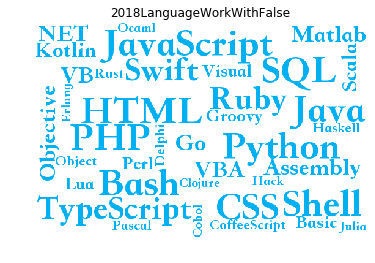

In [47]:
if __name__ == '__main__':
  # 导入内容
  content = CloudFalse.readCsv('2018LanguageWorkedWithDrop.csv') 
  #给词云配置内容,图片,字体（为了使中文字体不会乱码
  wc = CloudFalse(content, 'CODE.jpg', 'Songti.ttc')
  wc.show_wc('2018LanguageWorkWithFalse')
  wc.save_wc('2018LanguageWorkWithFalse.png')

### 这张图初看没什么问题，但其实是错的，C，C#，C++ 这些语言因为分词的关系而被略过了。这也是一些别的分析里出现的共性问题（单个字被略过）。
### 尽管在dict中添加了 C# 和 C，但并没有起到作用。
### 于是决定 先统计好词频，再生成字典，用读取字典的方式来显示词云。

In [92]:
import numpy as np
from PIL import Image,ImageSequence

class CloudTrue:
  def __init__(self, content,column,img_filepath, font_filepath):
    self.image =imread(img_filepath)#作为背景形状的图
    graph = np.array(self.image)
    self.wc = WordCloud(font_path = 'Songti.ttc', background_color = 'White', max_words = 200, mask = graph,random_state=42,
                   max_font_size=66,collocations=False)
    fp = content
    name = list(fp[column])#词
    value = fp.NumberCount#词的频率
    dic = dict(zip(name, value))#词频以字典形式存储
    self.wc.generate_from_frequencies(dic)#根据给定词频生成词云
    
    #展示词云 
  def show_wc(self,title):
    img_color = ImageColorGenerator(self.image)
    plt.imshow(self.wc.recolor(color_func=img_color))
    plt.axis("off")#不显示坐标轴
    plt.title(title)
    plt.show()
    
  #保存词云
  def save_wc(self, out_file_name):
    self.wc.to_file(out_file_name)
    
  #获取csv中的数据
  def readCsv(path):        
    fp = pd.read_csv(path)
    return fp

E:\Data Analysis\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


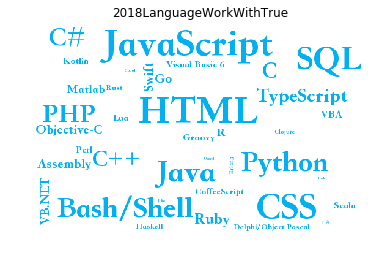

In [93]:
if __name__ == '__main__':
  content = CloudTrue.readCsv('dfDrop_Count.csv') 
  wc = CloudTrue(content,'LanguageWorkedWith', 'CODE.jpg', 'Songti.ttc')
  wc.show_wc('2018LanguageWorkWithTrue')
  wc.save_wc('2018LanguageWorkWithTrue.png')

### 这张图就比较完整了，而且词频的相对大小是准确的

E:\Data Analysis\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


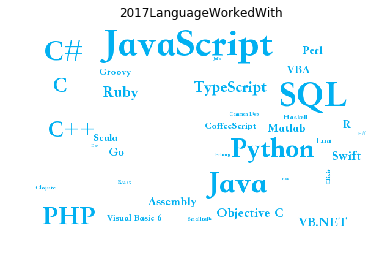

In [107]:
#读取2017年的HaveWorkedLanguage作为对比
data2017=pd.read_csv('2017_survey_results_public.csv')
#data2017.columns.values.tolist()
LanguageWorkedWith2017 = data2017.HaveWorkedLanguage.dropna()

df_LanguageWorkedWithClean2017 = pd.DataFrame(LanguageWorkedWith2017)
#df_LanguageWorkedWithClean2017 36625 row

dfDrop2017=df_LanguageWorkedWithClean2017.drop('HaveWorkedLanguage', axis=1).join(df_LanguageWorkedWithClean2017['HaveWorkedLanguage'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('HaveWorkedLanguage'))
#替换掉某些列首空格
dfDrop2017['HaveWorkedLanguage']=dfDrop2017['HaveWorkedLanguage'].str.strip()

dfDrop_Count2017=dfDrop2017.groupby(['HaveWorkedLanguage'],as_index=False)['HaveWorkedLanguage'].agg({'NumberCount':'count'})
dfDrop_Count2017.to_csv("2017LanguageWorkedWith.csv",index=False,sep=',')

if __name__ == '__main__':
  content = CloudTrue.readCsv('2017LanguageWorkedWith.csv') 
  wc = CloudTrue(content,'HaveWorkedLanguage', 'CODE.jpg', 'Songti.ttc')
  wc.show_wc('2017LanguageWorkedWith')
  wc.save_wc('2017LanguageWorkedWith.png')

In [108]:
#用LanguageDesireNextYear和LanguageWorkedWith
LanguageDesireNextYear = df.LanguageDesireNextYear.dropna()
df_LanguageDesireNextYearClean = pd.DataFrame(LanguageDesireNextYear)
#df_LanguageDesireNextYearClean
dfDropLanguageDesireNextYear=df_LanguageDesireNextYearClean.drop('LanguageDesireNextYear', axis=1).join(df_LanguageDesireNextYearClean['LanguageDesireNextYear'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('LanguageDesireNextYear'))
dfLanguageDesireNextYear_Count=dfDropLanguageDesireNextYear.groupby(['LanguageDesireNextYear'],as_index=False)['LanguageDesireNextYear'].agg({'NumberCount':'count'})
dfLanguageDesireNextYear_Count.to_csv("2018LanguageDesireNextYear_Count.csv",index=False,sep=',')
#df_LanguageDesireNextYearClean

E:\Data Analysis\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


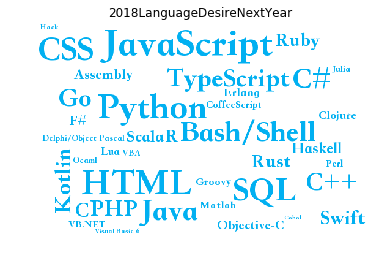

In [109]:
if __name__ == '__main__':
  content = CloudTrue.readCsv('2018LanguageDesireNextYear_Count.csv') 
  wc = CloudTrue(content,'LanguageDesireNextYear','CODE.jpg', 'Songti.ttc')
  wc.show_wc('2018LanguageDesireNextYear')
  wc.save_wc('2018LanguageDesireNextYear.png')    

E:\Data Analysis\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


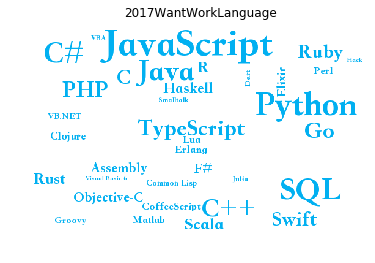

In [110]:
#读取2017年的WantWorkLanguage作为对比
WantWorkLanguage2017 = data2017.WantWorkLanguage.dropna()
df_WantWorkLanguage2017 = pd.DataFrame(WantWorkLanguage2017)
# df_LanguageWorkedWithClean2017 36625 row
dfDrop2017=df_WantWorkLanguage2017.drop('WantWorkLanguage', axis=1).join(df_WantWorkLanguage2017['WantWorkLanguage'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('WantWorkLanguage'))
#替换掉某些列首空格
dfDrop2017['WantWorkLanguage']=dfDrop2017['WantWorkLanguage'].str.strip()
dfDrop_Count2017=dfDrop2017.groupby(['WantWorkLanguage'],as_index=False)['WantWorkLanguage'].agg({'NumberCount':'count'})
dfDrop_Count2017.to_csv("2017WantWorkLanguage.csv",index=False,sep=',')

if __name__ == '__main__':
  content = CloudTrue.readCsv('2017WantWorkLanguage.csv') 
  wc = CloudTrue(content,'WantWorkLanguage', 'CODE.jpg', 'Songti.ttc')
  wc.show_wc('2017WantWorkLanguage')
  wc.save_wc('2017WantWorkLanguage.png')

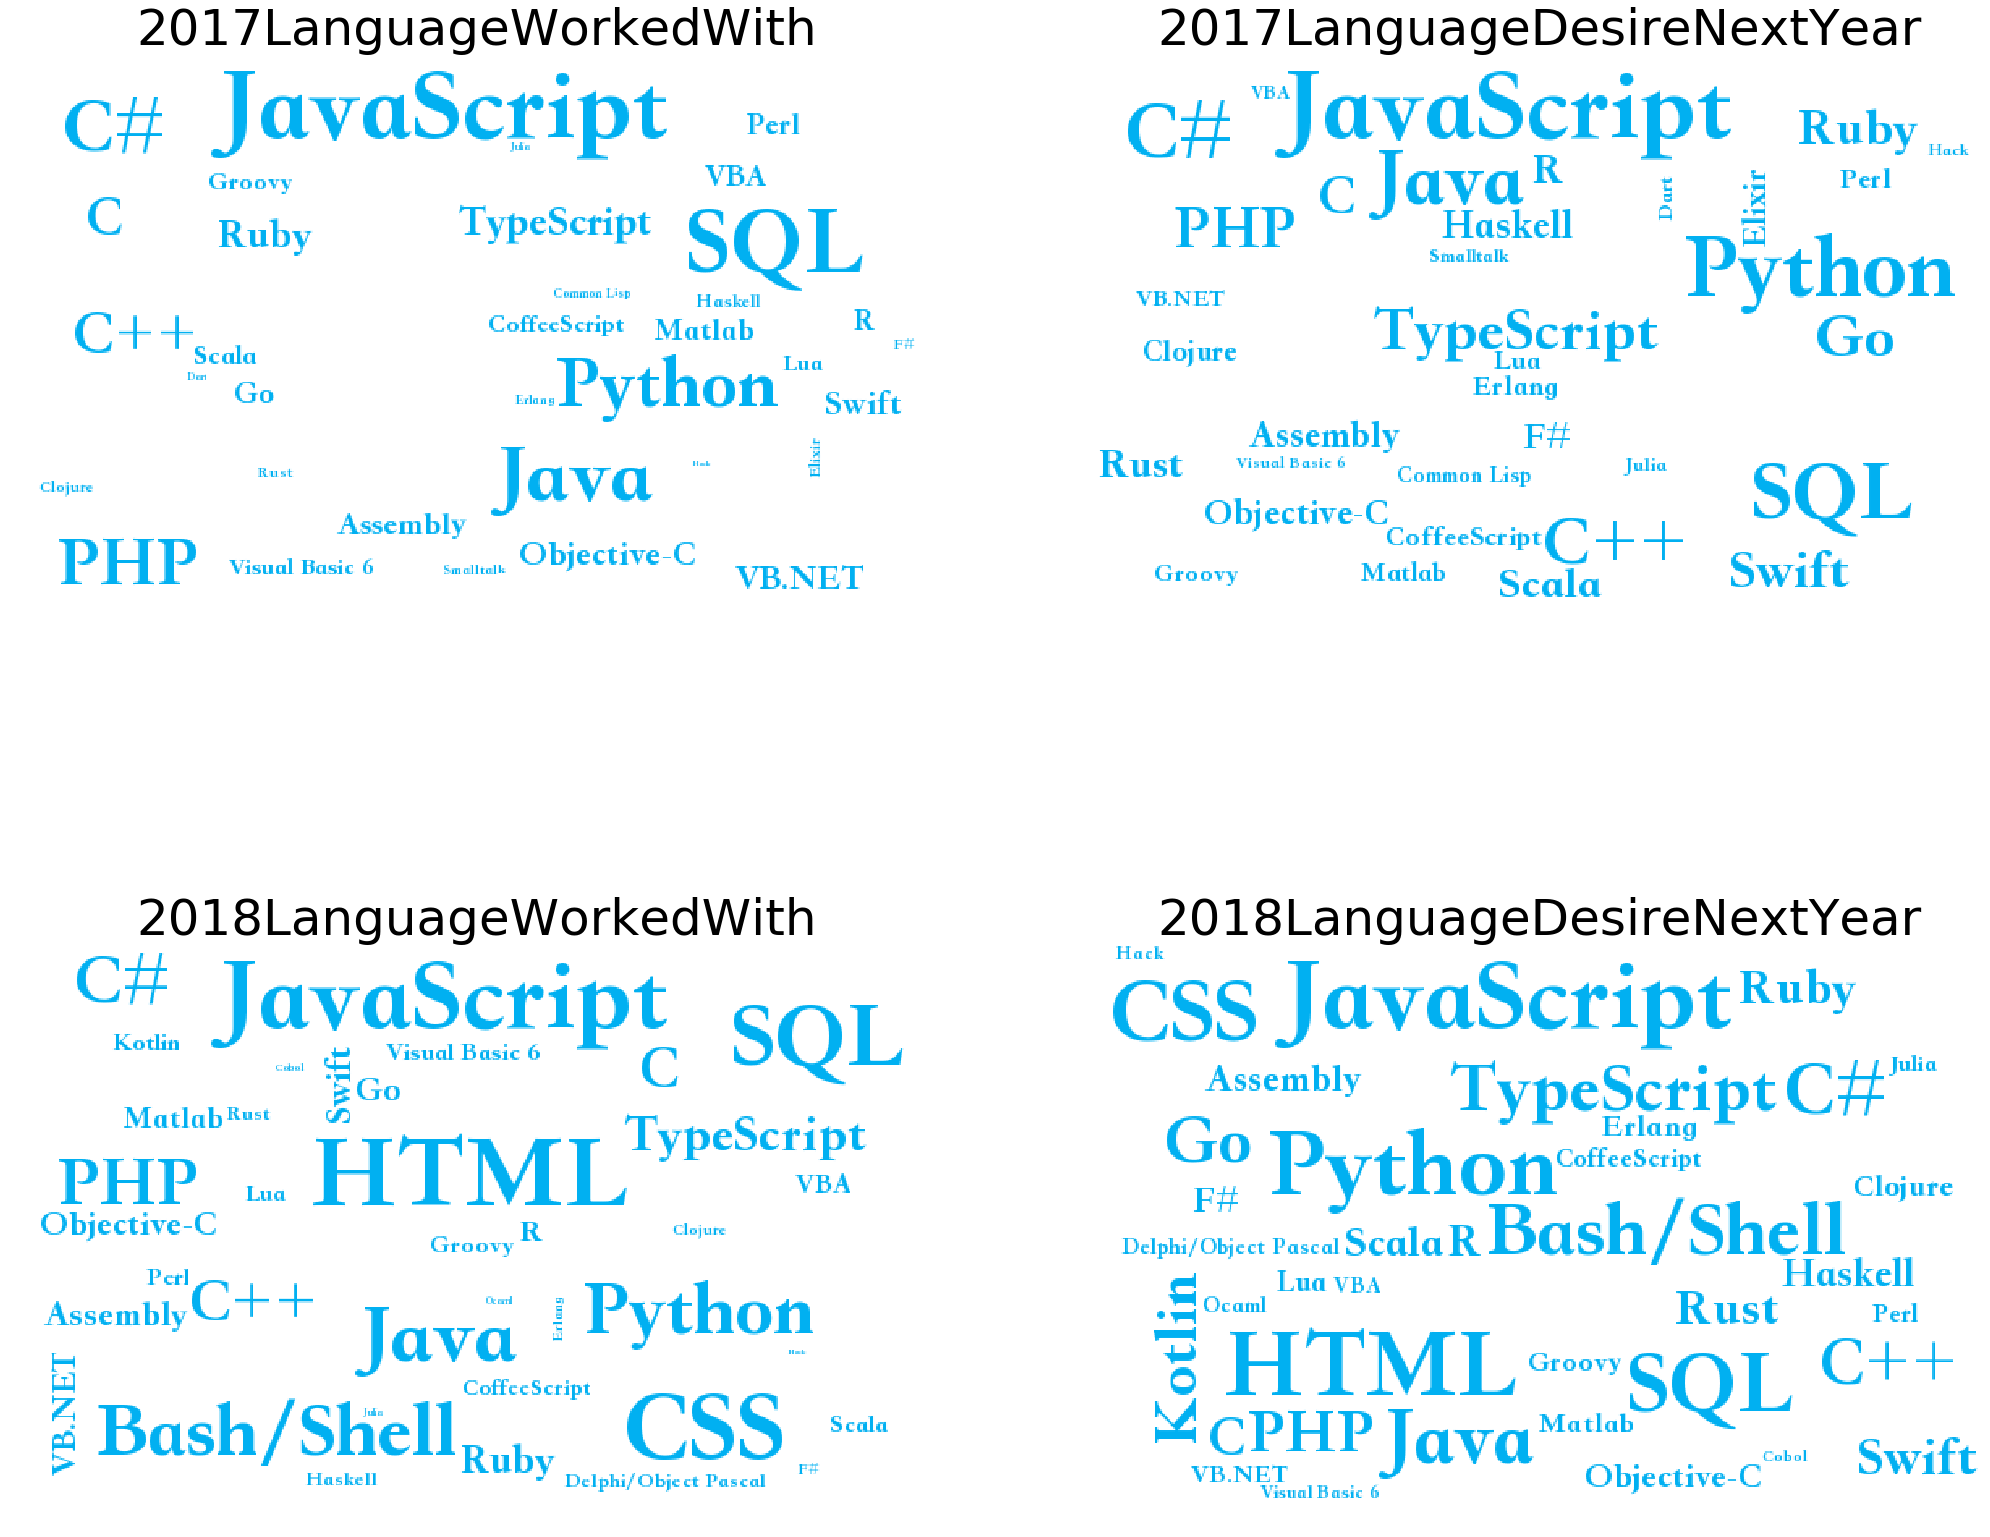

In [114]:
#把四张图放在一起对比
from PIL import Image
plt.figure(figsize=(54, 30))

plt.subplot(231)
plt.title("2017LanguageWorkedWith",fontsize=50)
plt.imshow(Image.open('2017LanguageWorkedWith.png'))
plt.axis("off")

plt.subplot(232)
plt.title("2017LanguageDesireNextYear",fontsize=50)
plt.imshow(Image.open('2017WantWorkLanguage.png'))
plt.axis("off")

plt.subplot(234)
plt.title("2018LanguageWorkedWith",fontsize=50)
plt.imshow(Image.open('2018LanguageWorkWithTrue.png'))
plt.axis("off")

plt.subplot(235)
plt.title("2018LanguageDesireNextYear",fontsize=50)
plt.imshow(Image.open('2018LanguageDesireNextYear.png'))
plt.axis("off")

plt.show()

### 结论：
### 纵向来看，2018年的统计量比2017年多了不少，比如 JS,CSS,HTML，Bash/Shell 在2017年表里是没有的,所以整体2018年的词云更密集
### 横向来看，在未来希望使用的语言中，与已使用的语言相比，一些冷门小众的语言大部分比例有所上升，说明程序猿们有着相对开放的学习态度

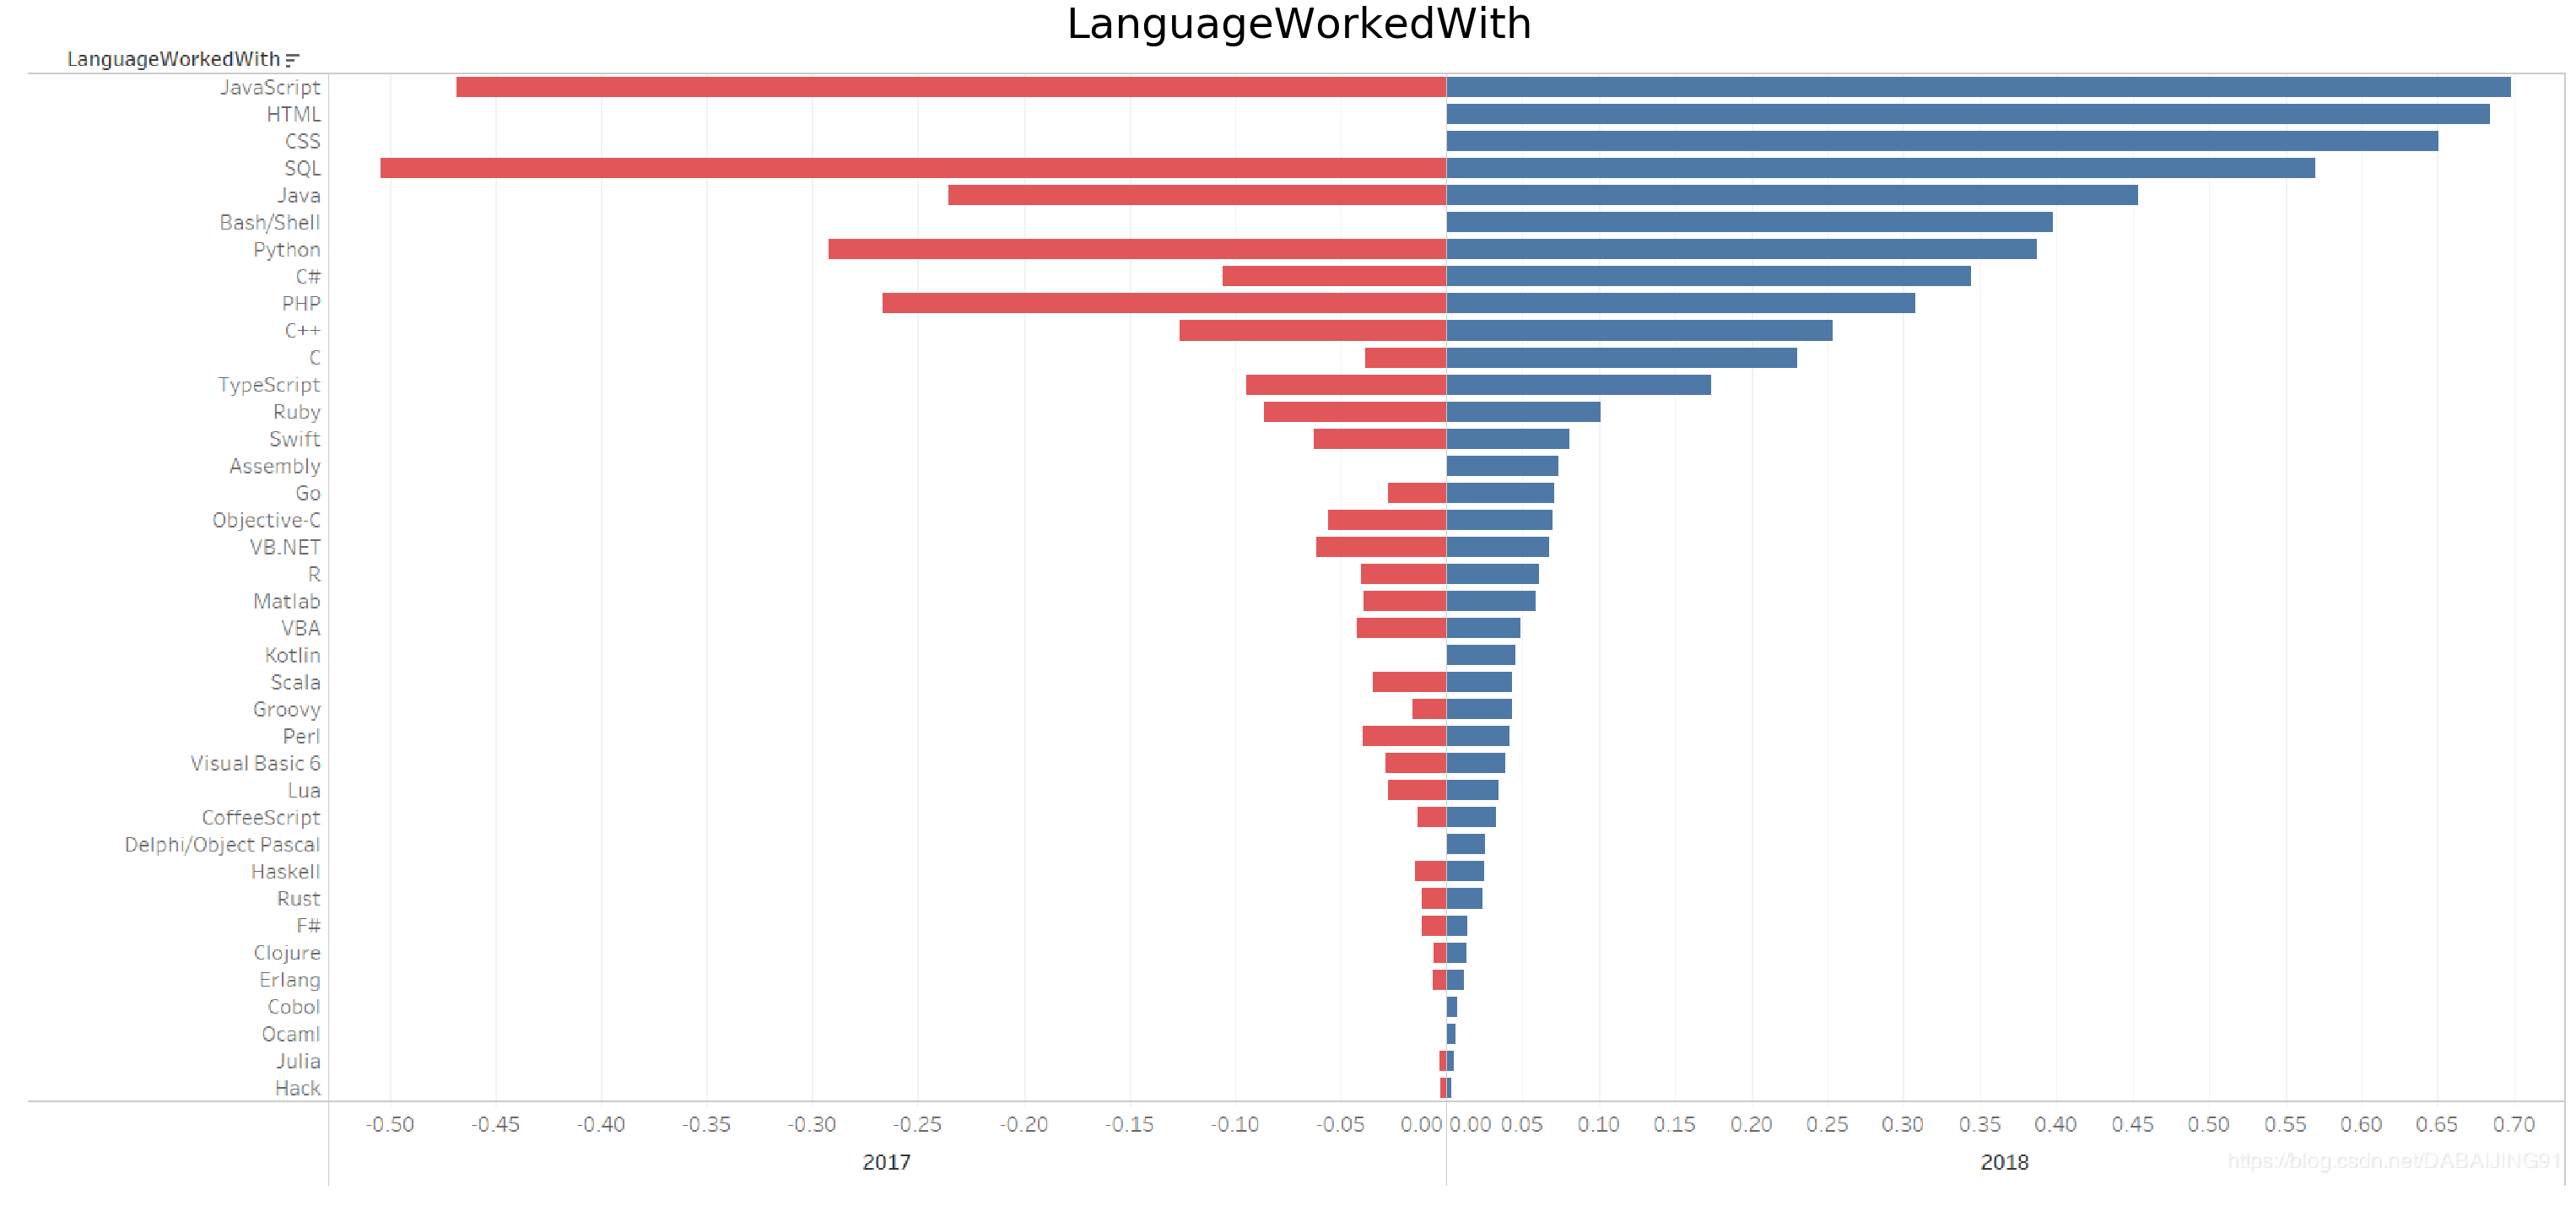

In [118]:
#打开Tableau做的蝴蝶图
plt.figure(figsize=(54, 30))
plt.axis("off")
plt.title("LanguageWorkedWith",fontsize=50)
plt.imshow(Image.open('LanguageWorkWith_20172018.png'))

### 结论：
### 绝大多数语言的比例都上升了，考虑到17年样本量较小，统计量较少等因素，因而比例和相对变化率并不能用于说明绝对问题，比如这一年上涨最快的是HTML,CSS,Bash,是因为17年并没有统计这些语言，而非语言本身的增长；
### 考虑到这个问卷填写方式，本空属于多选，所以普遍增多的趋势可以说明大部分填写问卷的人掌握的编程语言变多了。

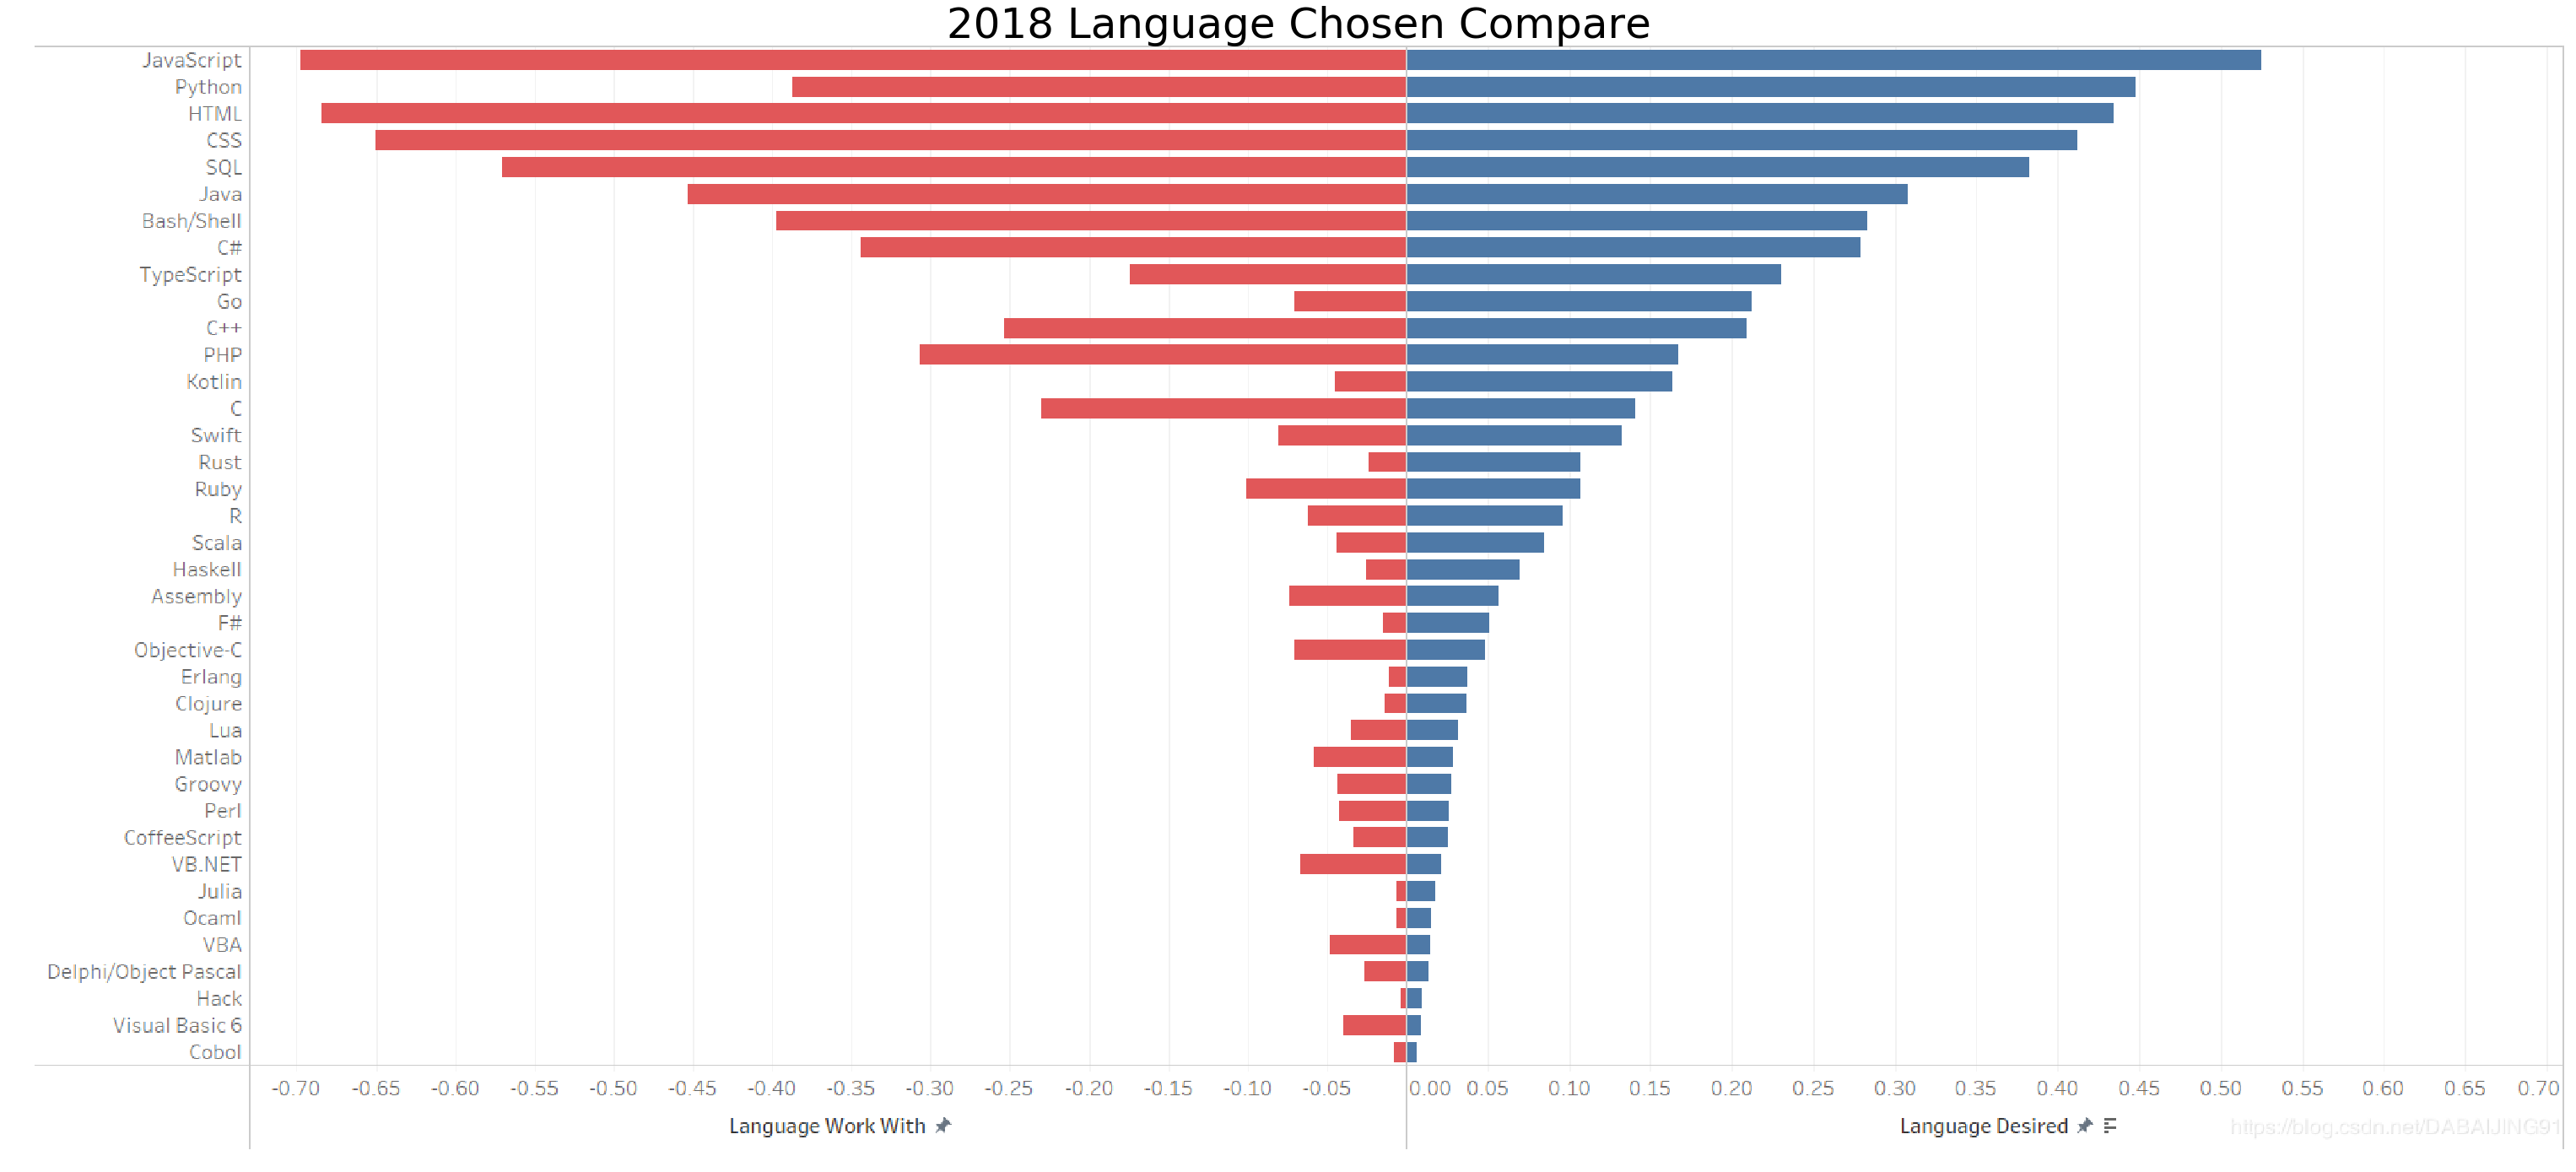

In [127]:
plt.figure(figsize=(54, 30))
plt.axis("off")
plt.title("2018 Language Chosen Compare",fontsize=50)
plt.imshow(Image.open('2018LanguageChosenCompare.png'))

### 结论：
### 如上所述，在未来学习倾向上，大家还是倾向于喜新厌旧的，越是主流的语言，“抛弃”的概率就越大，小众的语言反而更具有吸引力。

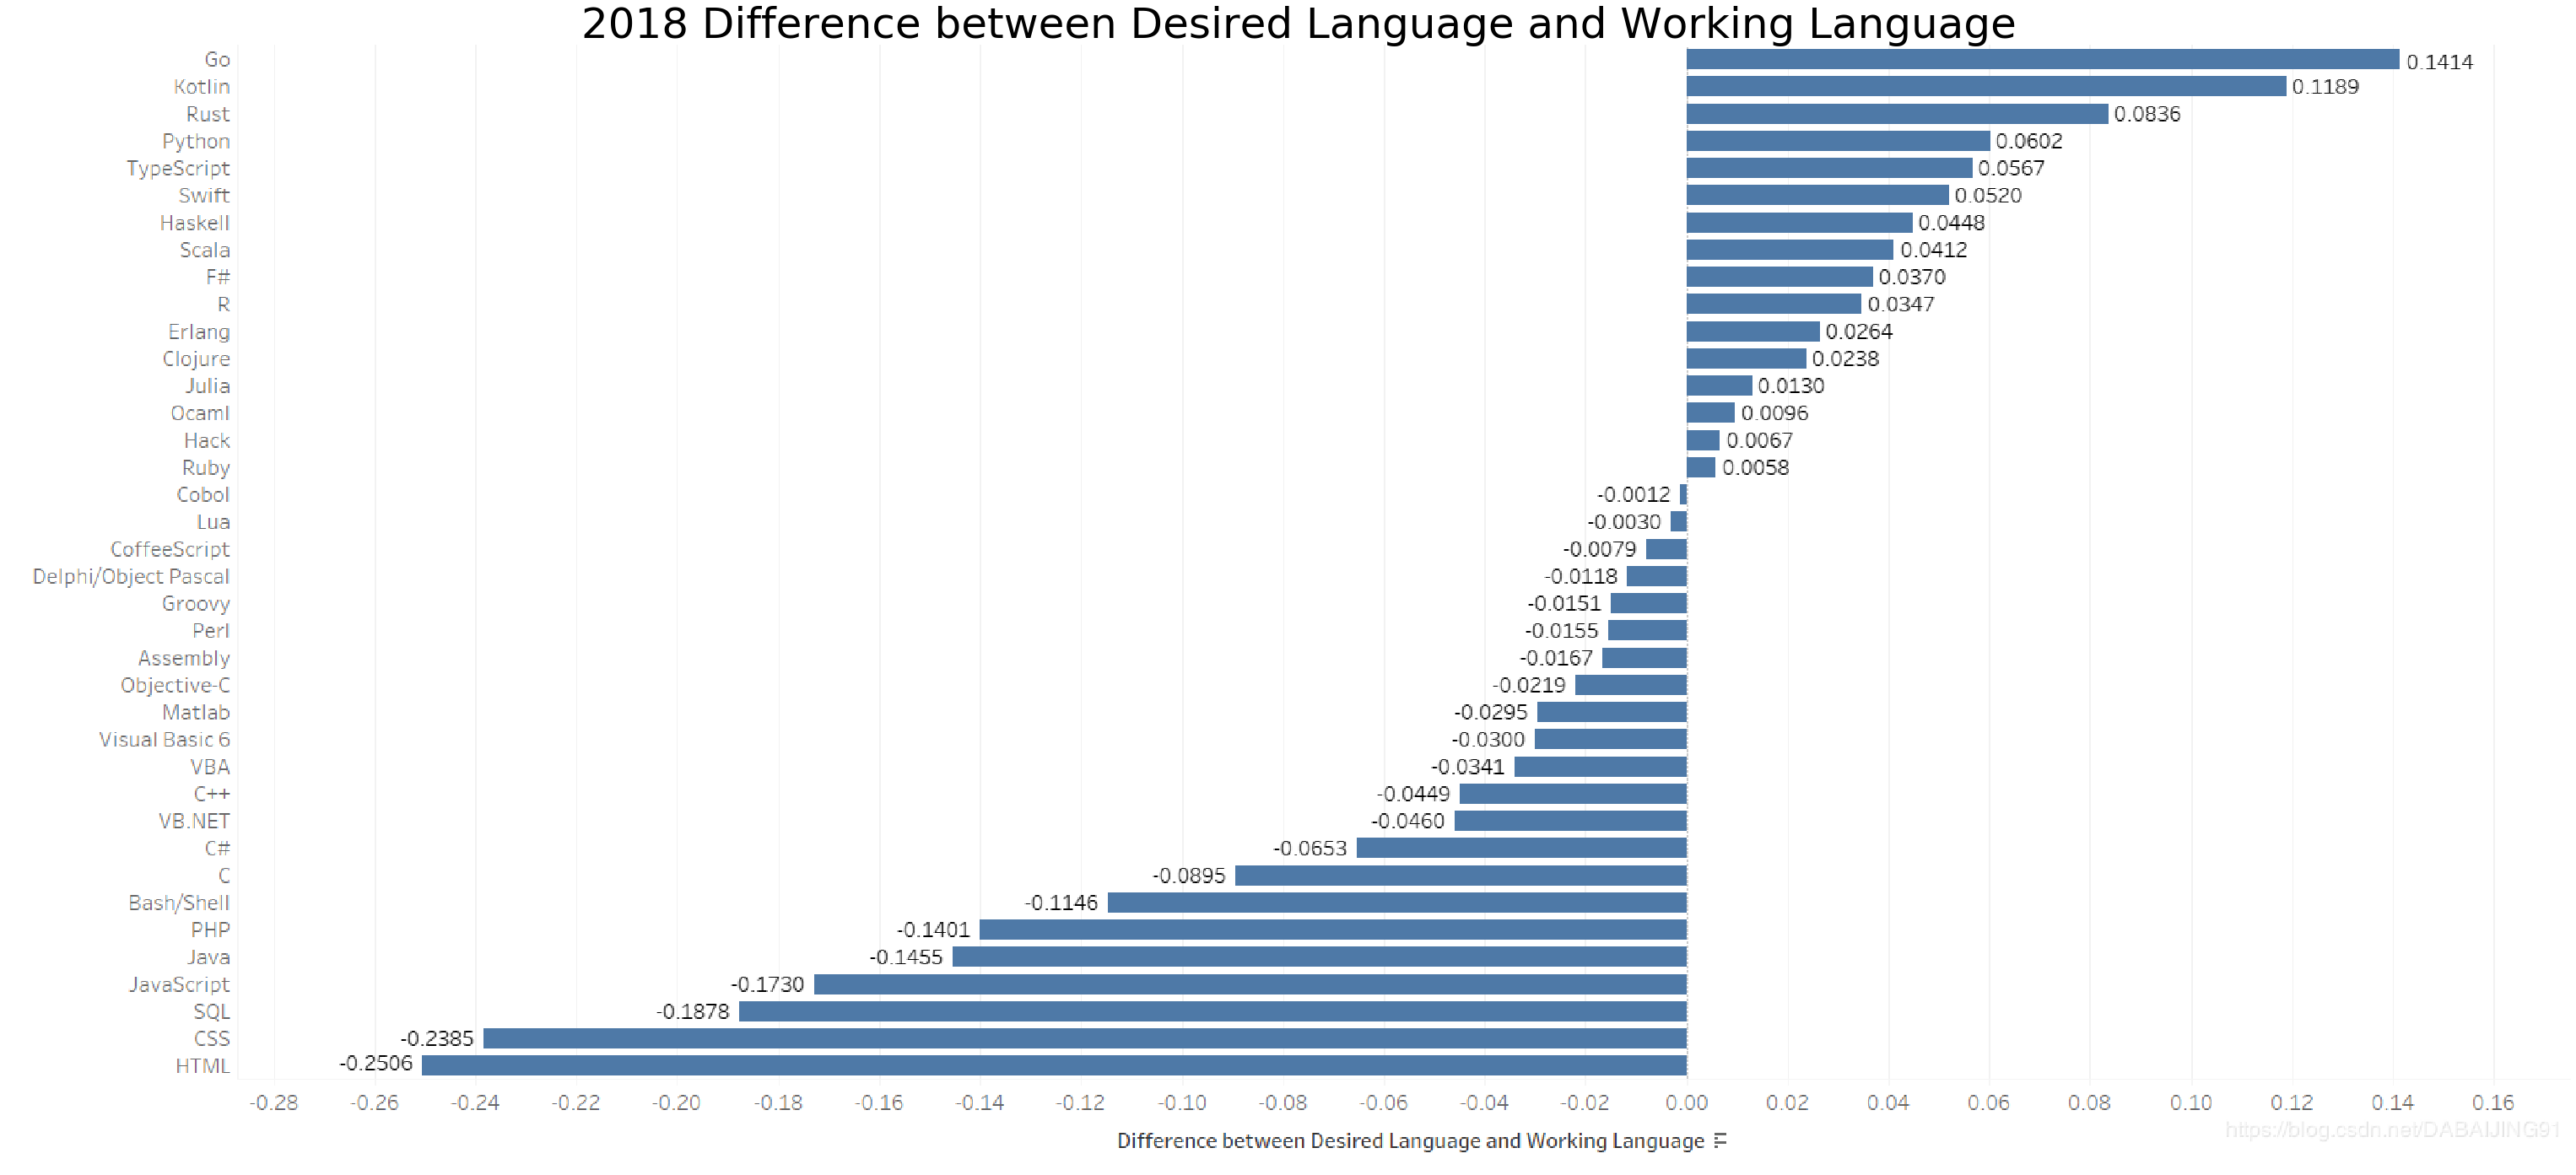

In [123]:
plt.figure(figsize=(54, 30))
plt.axis("off")
plt.title("2018 Difference between Desired Language and Working Language",fontsize=50)
plt.imshow(Image.open('2018DifferenceinLanguageChosen.png'))

### 说明：为了量化比较，假设 未来看好度= 追求度-使用度（解读的时候，结果是负的，就是未来被抛弃看低；正的则说明更为看好）
### 结论：
### 第1类以HTML，CSS，SQL等一众老牌主流为代表，被“抛弃”度最高；
### 第2类以Go，Kotlin，Rust等为代表，小众里的热点网红；
### Python是唯一兼具使用度前10和网红度前5的语言，可谓大势所趋，前途无量。

In [124]:
#对比平台使用度
PlatformWorkedWith = df.PlatformWorkedWith.dropna()
df_PlatformWorkedWithClean = pd.DataFrame(PlatformWorkedWith)
#df_PlatformWorkedWithClean
dfDropPlatformWorkedWith=df_PlatformWorkedWithClean.drop('PlatformWorkedWith', axis=1).join(df_PlatformWorkedWithClean['PlatformWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('PlatformWorkedWith'))
dfPlatformWorkedWithr_Count=dfDropPlatformWorkedWith.groupby(['PlatformWorkedWith'],as_index=False)['PlatformWorkedWith'].agg({'NumberCount':'count'})
#dfPlatformWorkedWithr_Count
#df_PlatformWorkedWithClean 65999 
dfPlatformWorkedWithr_Count.to_csv("dfPlatformWorkedWith_Count.csv",index=False,sep=',')

In [125]:
PlatformDesireNextYear = df.PlatformDesireNextYear.dropna()
df_PlatformDesireNextYearClean = pd.DataFrame(PlatformDesireNextYear)
#df_PlatformWorkedWithClean
dfDropPlatformDesireNextYear=df_PlatformDesireNextYearClean.drop('PlatformDesireNextYear', axis=1).join(df_PlatformDesireNextYearClean['PlatformDesireNextYear'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('PlatformDesireNextYear'))
dfPlatformDesireNextYear_Count=dfDropPlatformDesireNextYear.groupby(['PlatformDesireNextYear'],as_index=False)['PlatformDesireNextYear'].agg({'NumberCount':'count'})
#dfPlatformWorkedWithr_Count
#df_PlatformDesireNextYearClean  61353 
dfPlatformDesireNextYear_Count.to_csv("dfPlatformDesireNextYear_Count.csv",index=False,sep=',')

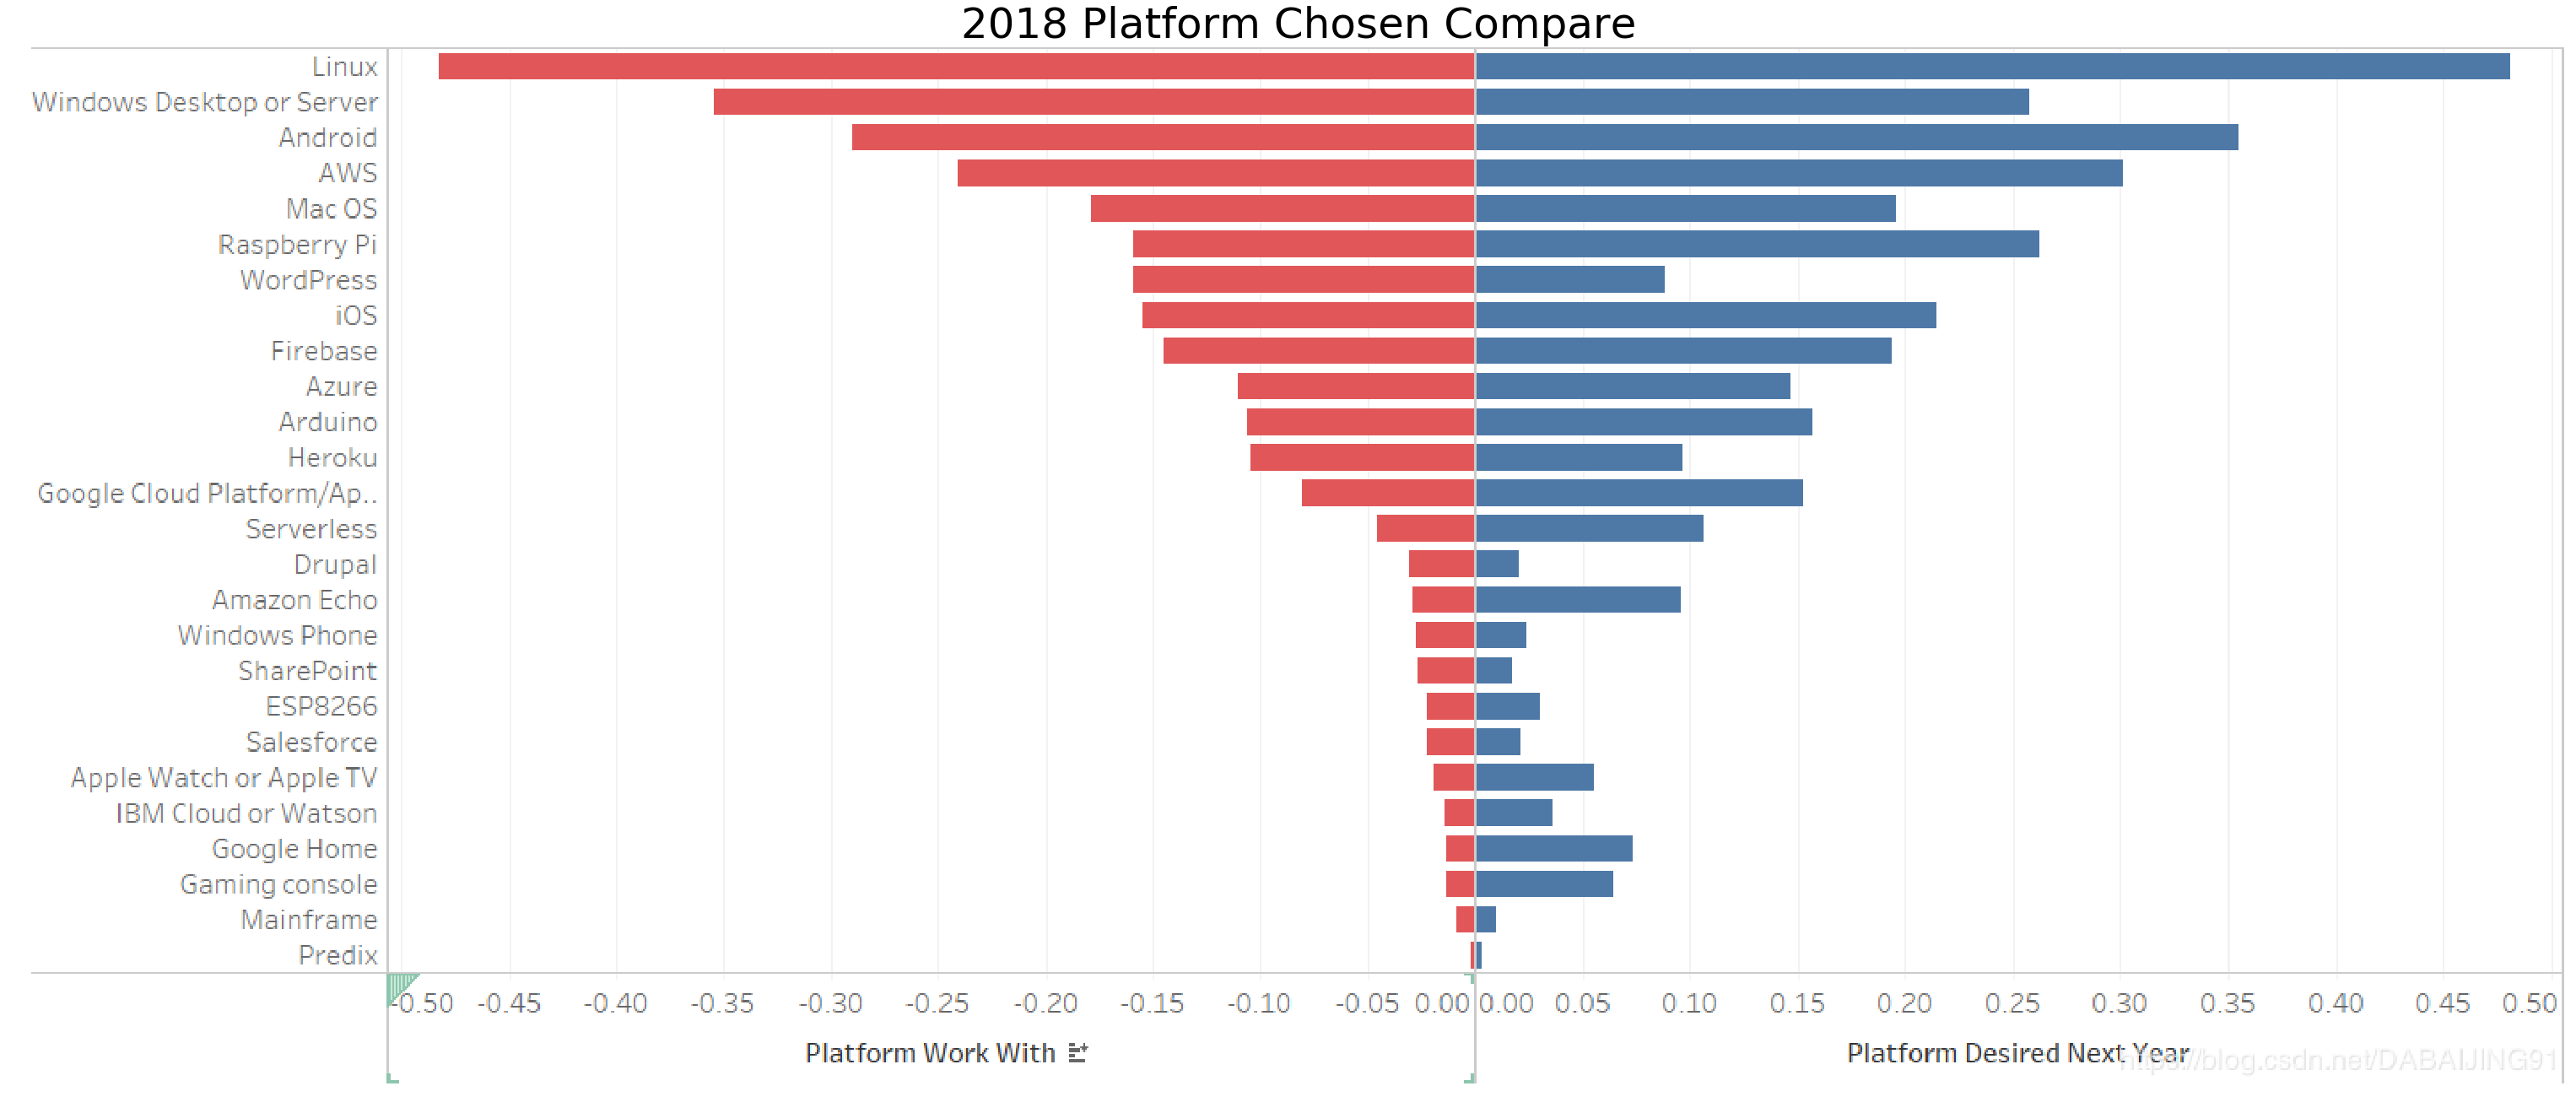

In [128]:
plt.figure(figsize=(54, 30))
plt.axis("off")
plt.title("2018 Platform Chosen Compare",fontsize=50)
plt.imshow(Image.open('2018PlatformChosenCompare.png'))

### 结论：
### 在当前使用度较高的平台中，Windows和Wordpress是明显“被抛弃度”比较高的；
### 较小众的平台，比如GoogleHome,Gaming Console同样未来被看好程度比较高;
### 为了量化（追求度-使用度），生成下图

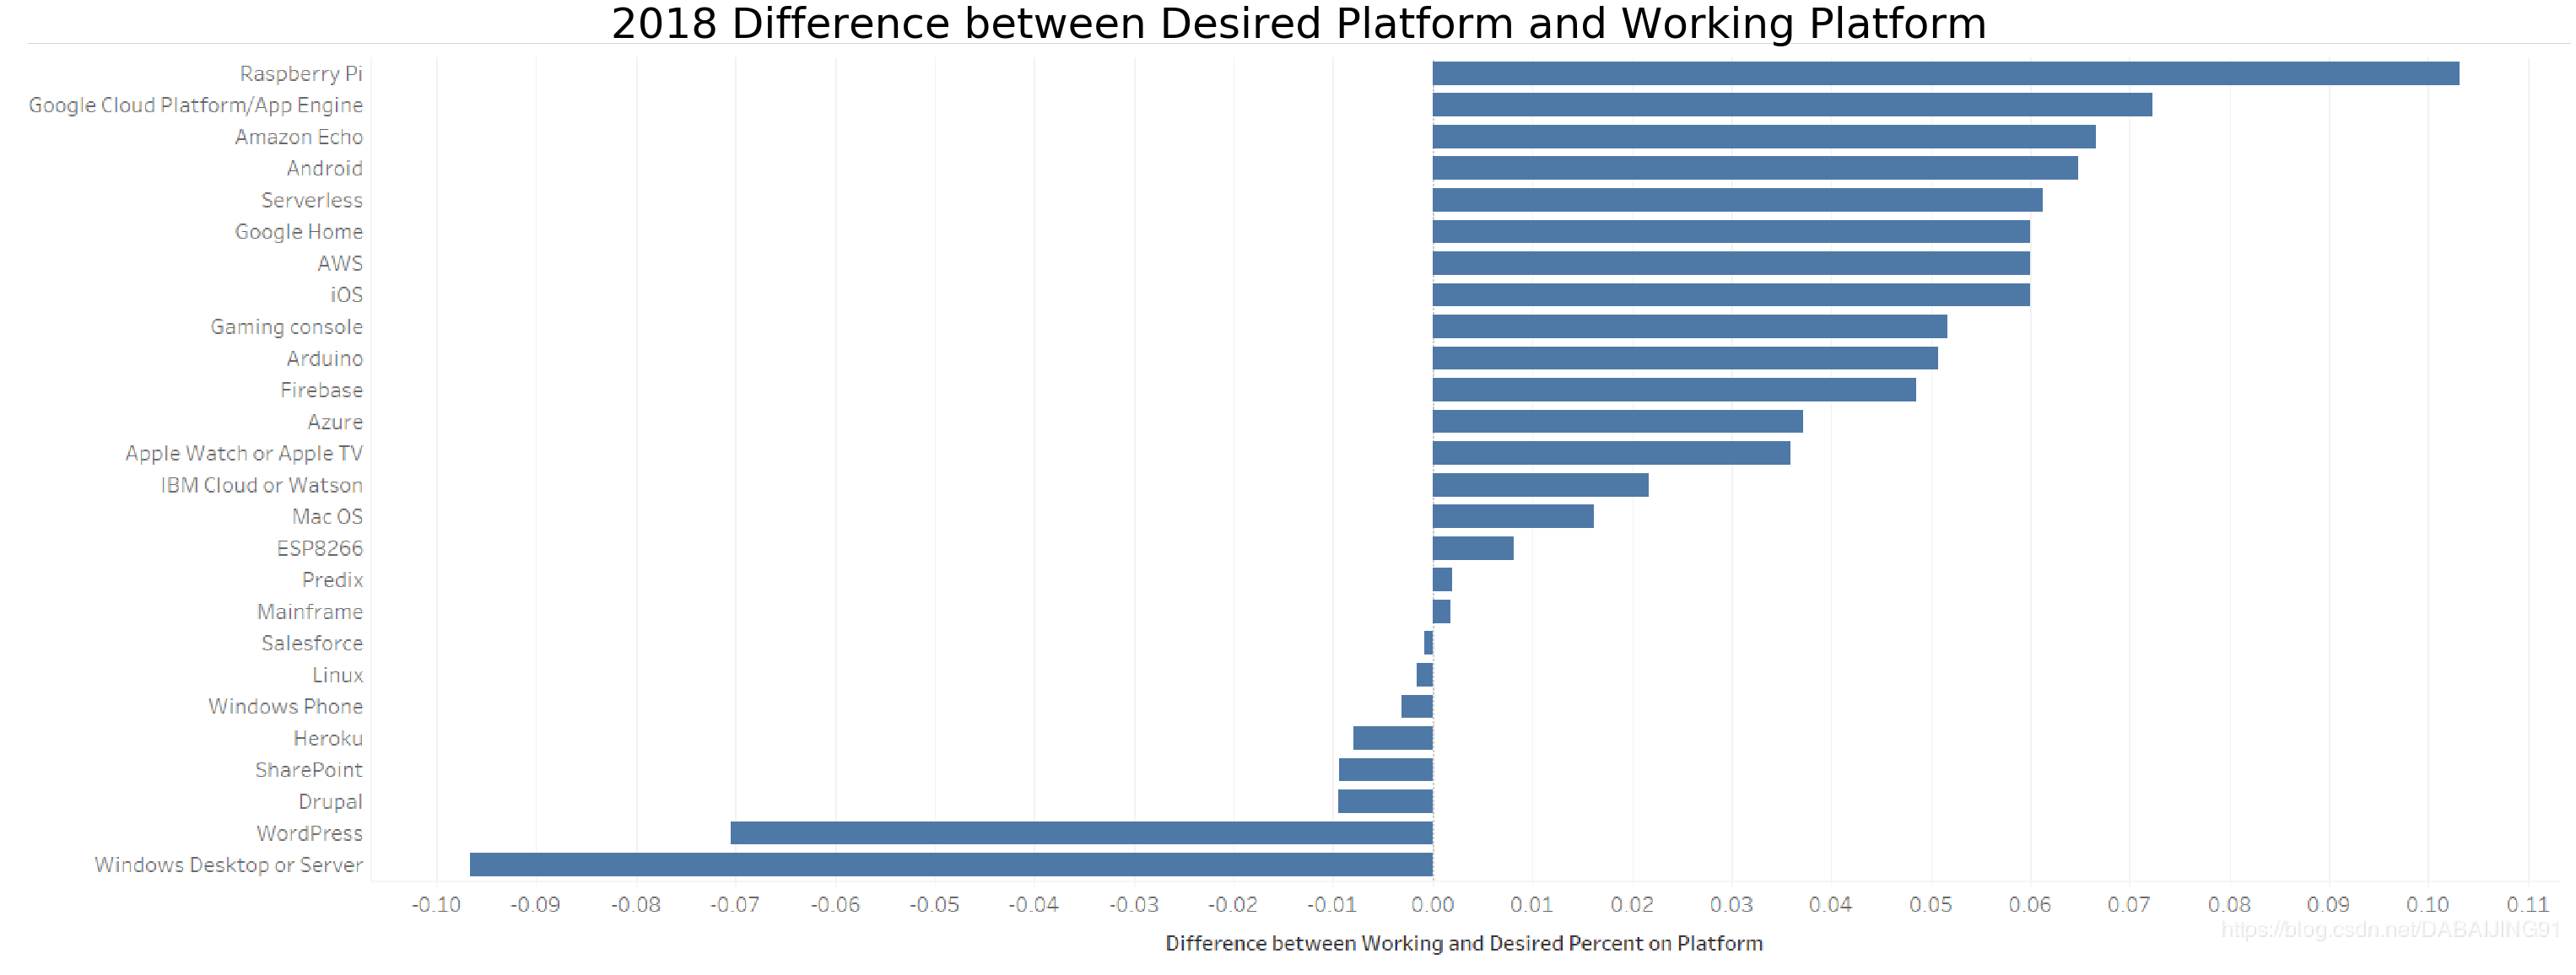

In [129]:
plt.figure(figsize=(54, 30))
plt.axis("off")
plt.title("2018 Difference between Desired Platform and Working Platform",fontsize=50)
plt.imshow(Image.open('2018DifferenceinPlatformChosen.png'))

### 结论：
### Windows和Wordpress是唯二“被抛弃度”超过1%的平台，而且是大幅度超过，这说明在程序猿领域，大家对他们两“用并且恨着”；
### Google（Google Cloud,Android,Google Home）和Amazon（Amazon Echo，AWS）都在比较被看好的前列，说明程序猿对这两家公司的产品还是比较认可的；
### 苹果系列（IOS,Apple Watch，Mac）虽然比不过上述两家，但仍然处在相对比较看好的位置；
### Raspberry Pi的大幅领先反映了程序猿对开源硬件及相关物联网领域的未来看好趋势。

In [132]:
Salary = df.Salary.dropna()
#Salary
ConvertedSalary = df.ConvertedSalary.dropna()
#ConvertedSalary
Currency = df.Currency.dropna()
df_CurrencyClean = pd.DataFrame(Currency)
#df_PlatformWorkedWithClean
#dfDropPlatformWorkedWith=df_PlatformWorkedWithClean.drop('Currency', axis=1).join(df_CurrencyClean['Currency'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('PlatformWorkedWith'))
dfCurrency_Count=df_CurrencyClean.groupby(['Currency'],as_index=False)['Currency'].agg({'NumberCount':'count'})
#dfCurrency_Count

### 鉴于不同国家工资水平差异比较大，因此先将较为接近的欧洲和美国单列出来分析工资与性别的关系

In [134]:
dfSalaryAnalysis=pd.DataFrame(df[['ConvertedSalary', 'Gender','Currency']])
dfSalaryAnalysis = dfSalaryAnalysis.dropna() 
#dfSalaryAnalysis
indexNames = dfSalaryAnalysis[ dfSalaryAnalysis['ConvertedSalary'] == 0.0 ].index
dfSalaryAnalysis = dfSalaryAnalysis[(dfSalaryAnalysis['ConvertedSalary'] != 0.0)&((dfSalaryAnalysis['Gender'] == 'Male')|(dfSalaryAnalysis['Gender'] == 'Female'))&((dfSalaryAnalysis['Currency'] == 'U.S. dollars ($)')|(dfSalaryAnalysis['Currency'] == 'Euros (€)'))]
dfSalaryAnalysis.to_csv("dfSalaryAnalysisGenderUE.csv",index=False,sep=',')
#dfSalaryAnalysis

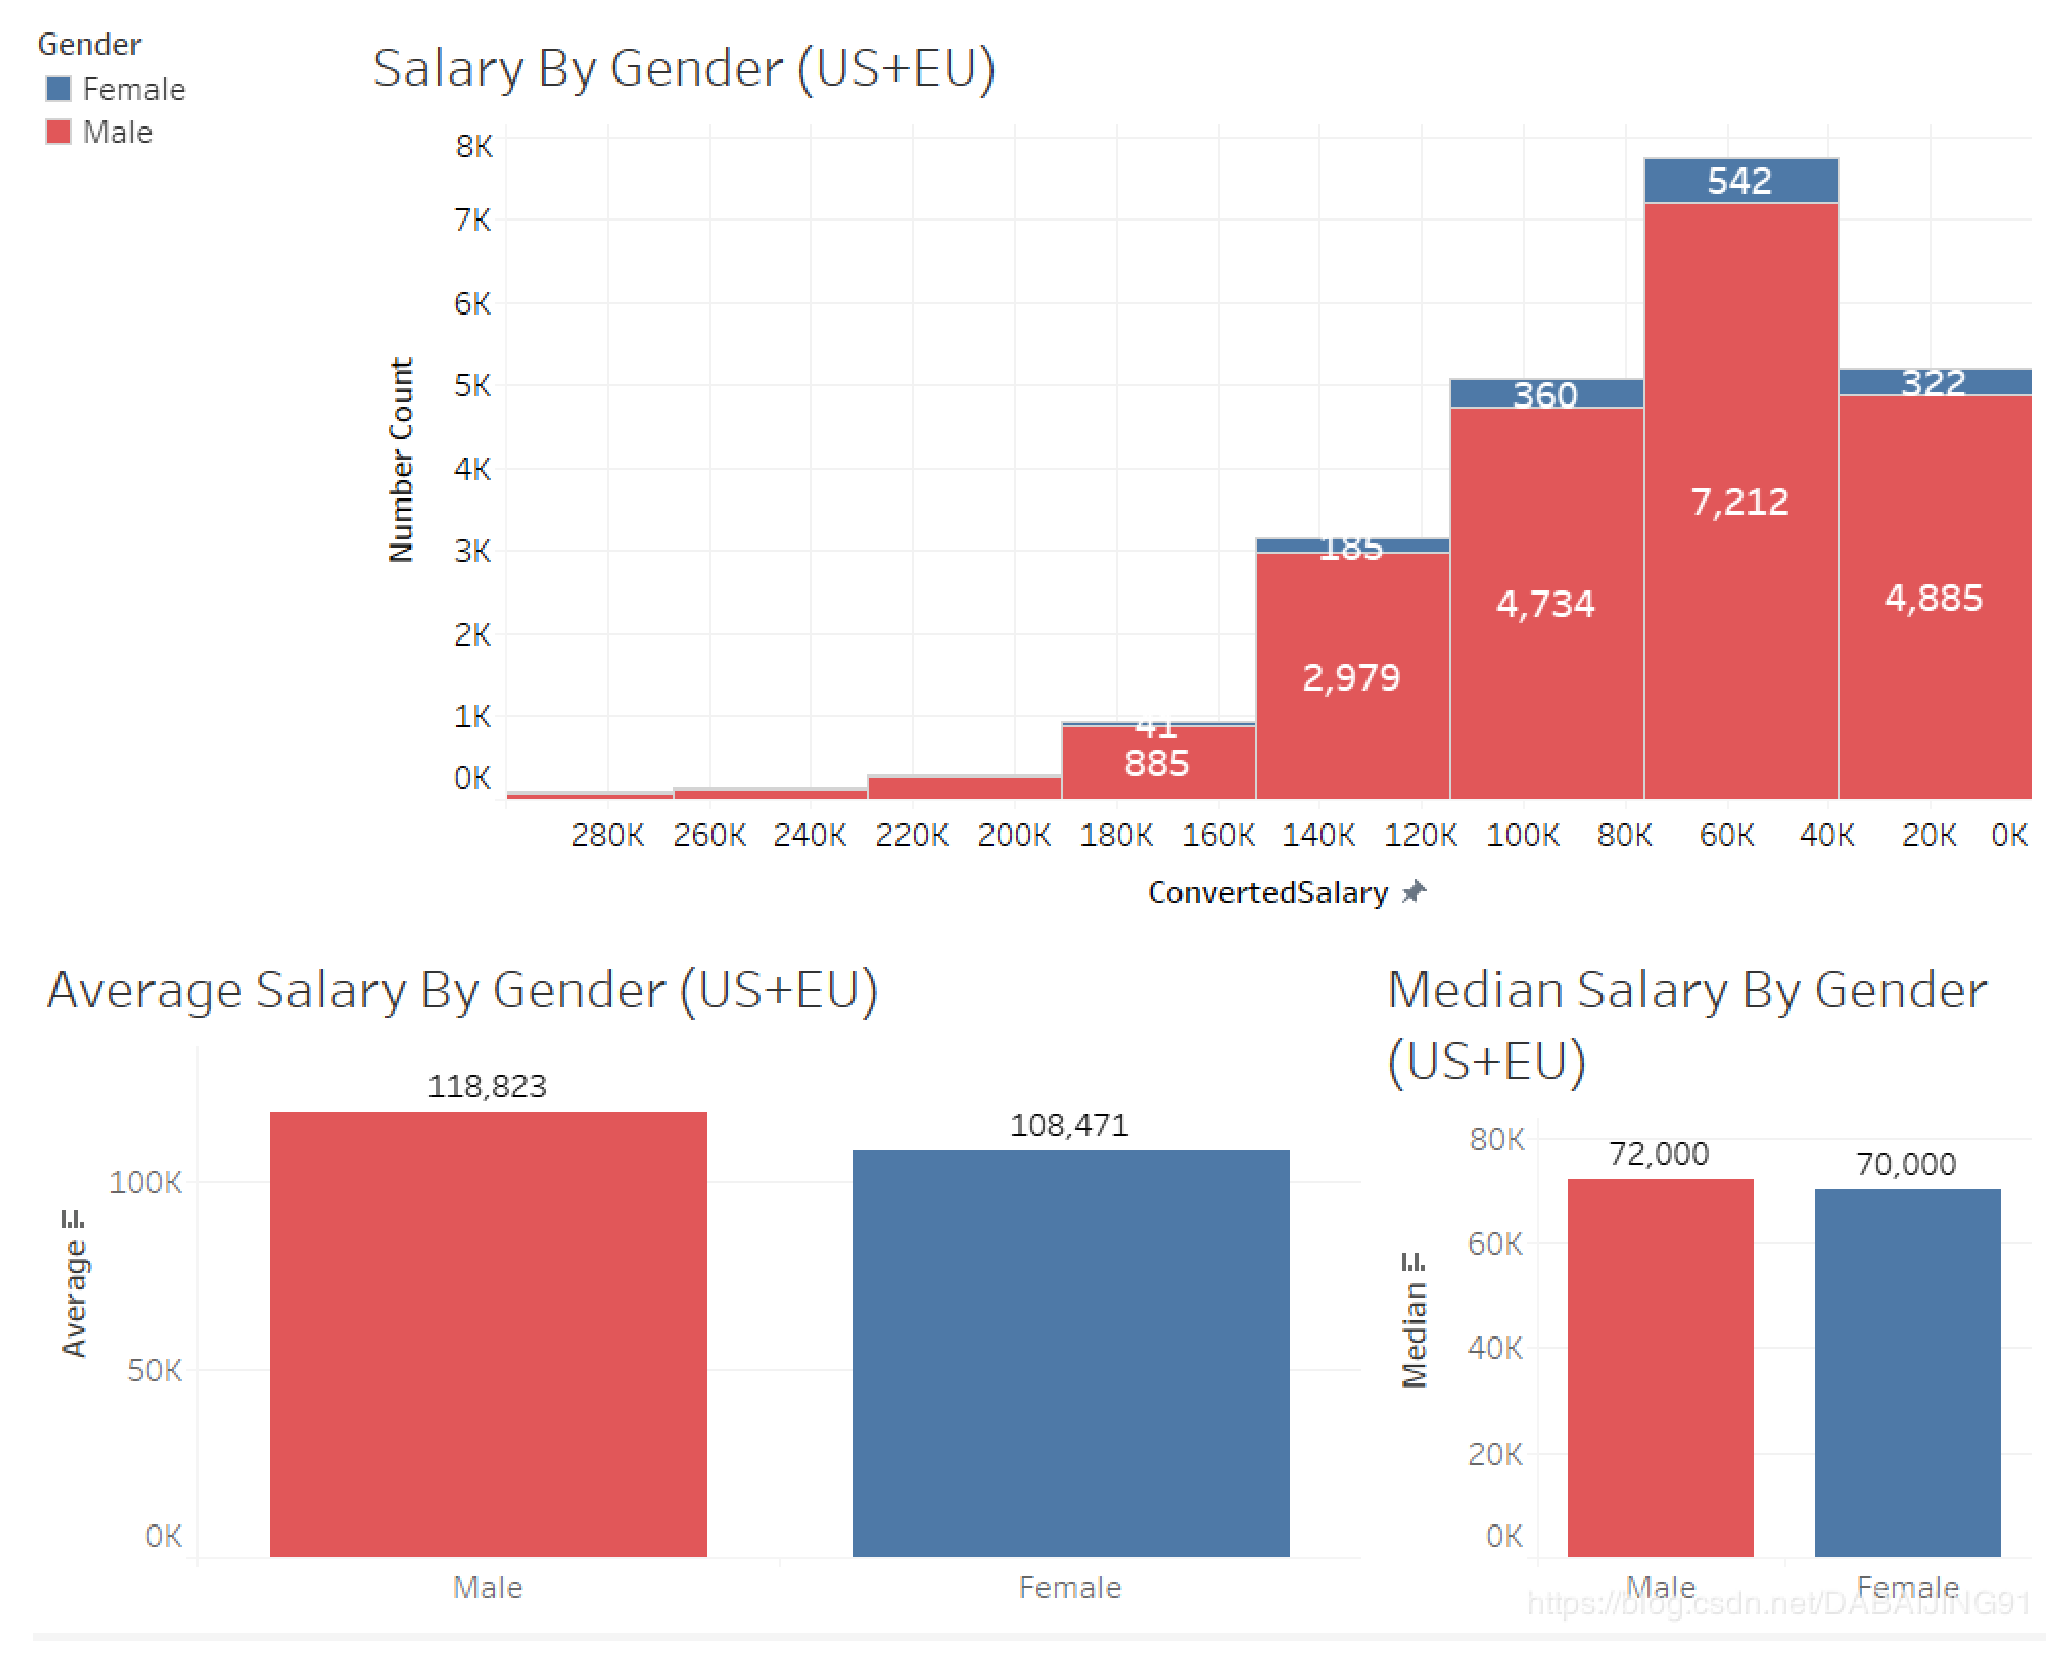

In [136]:
plt.figure(figsize=(54, 30))
plt.axis("off")
#plt.title("SalaryByGender(US+EU)",fontsize=50)
plt.imshow(Image.open('SalaryByGender(US+EU).png'))

### 结论：
### 从平均数和中位数来看，程序猿收入平均要略高于程序媛；
### 大部分人年收入在15万刀以下，特别是4万-8万是最为密集的区间，呈现典型的正态分布；
### 15万刀以上的程序媛比例急剧减少，说明超级程序猿中女生的稀缺状态；
### 考虑虽然程序猿的平均收入比程序媛要高10000刀,但中位数就只差1000刀,以及15万刀以上程序媛的绝迹状态。可以说在普通程序猿的水平里
### 男女性别差异并没有显著影响；在越高的水平中，女生比例越低。

### 除欧美以外其他地区

In [137]:
dfSalaryAnalysis=pd.DataFrame(df[['ConvertedSalary', 'Gender','Currency']])
dfSalaryAnalysis = dfSalaryAnalysis.dropna() 
#dfSalaryAnalysis
indexNames = dfSalaryAnalysis[ dfSalaryAnalysis['ConvertedSalary'] == 0.0 ].index
dfSalaryAnalysisOther = dfSalaryAnalysis[(dfSalaryAnalysis['ConvertedSalary'] != 0.0)&((dfSalaryAnalysis['Gender'] == 'Male')|(dfSalaryAnalysis['Gender'] == 'Female'))&((dfSalaryAnalysis['Currency'] != 'U.S. dollars ($)')&(dfSalaryAnalysis['Currency'] != 'Euros (€)'))]
#dfSalaryAnalysisCN
dfSalaryAnalysisOther.to_csv("dfSalaryAnalysisGenderOther.csv",index=False,sep=',')

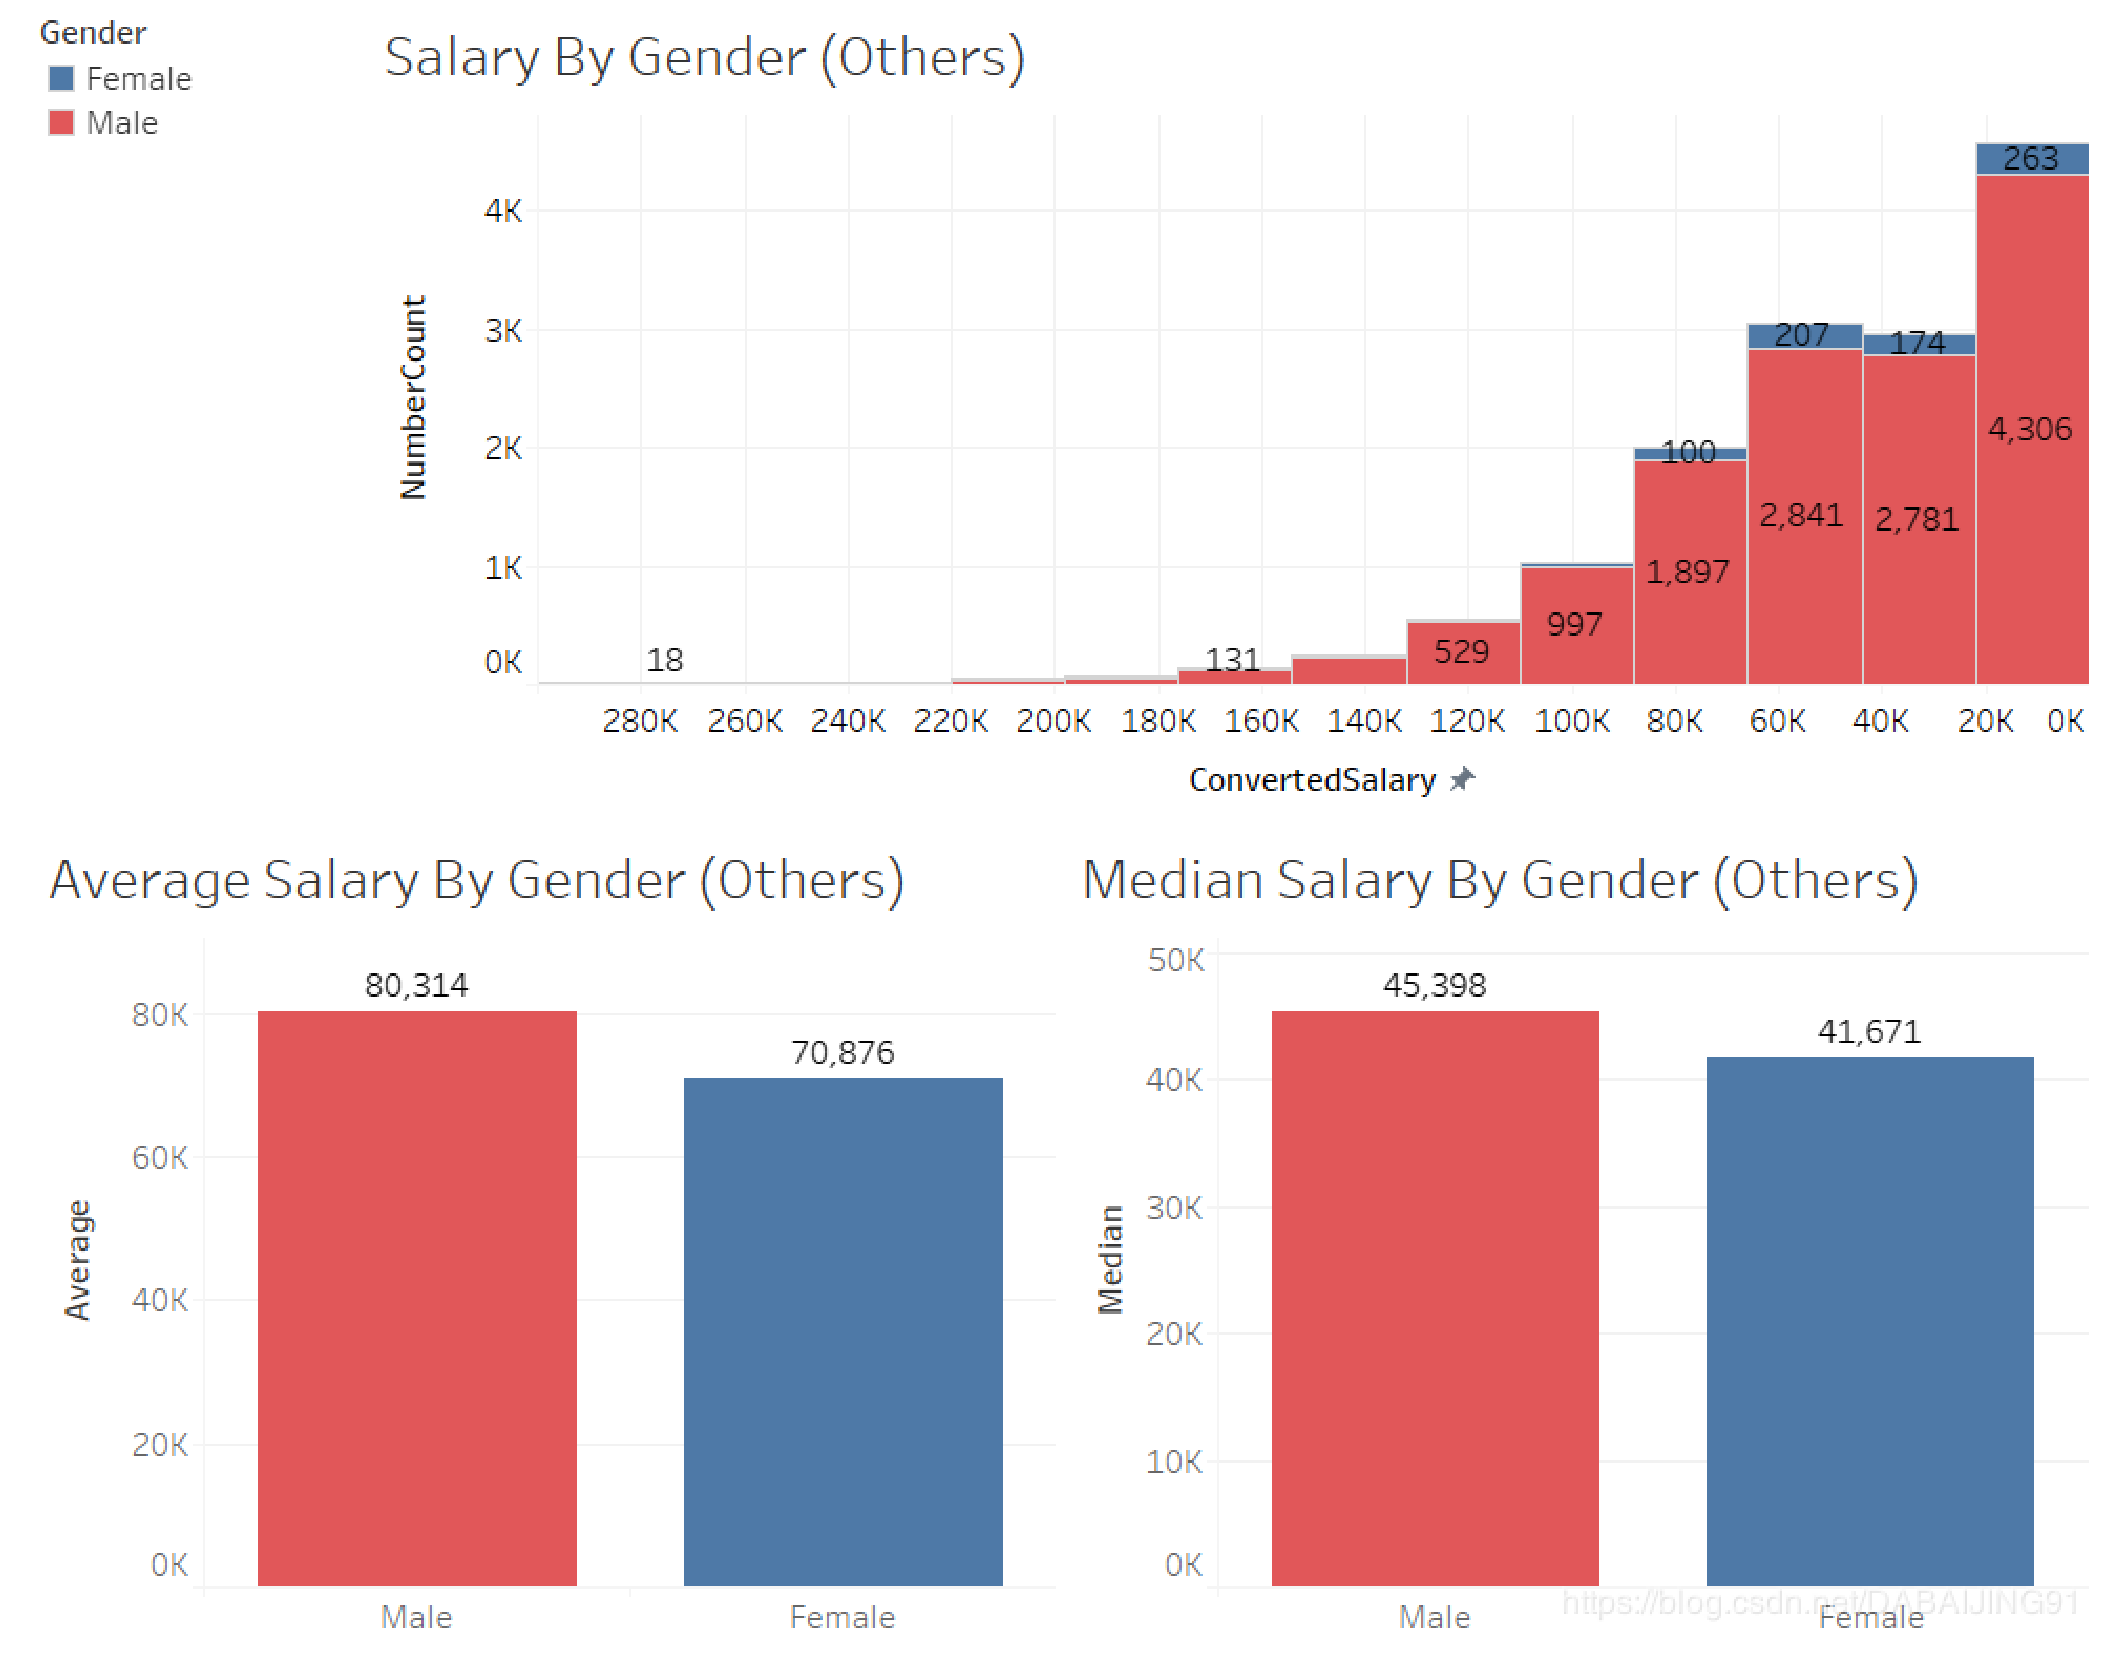

In [139]:
plt.figure(figsize=(54, 30))
plt.axis("off")
plt.imshow(Image.open('SalaryByGenderOthers.png'))

### 结论：
### 和欧美相比，其他地区平均收入和中位数都要低3万刀；
### 男女之间的收入差距也比欧美要更大（中位数差距增加1倍）；
### 不论男女，低收入比例均有增加，在0-2万最为聚集（前期已经排除了0数据），假定技术水平相当的话，提升收入最为有效的方式是去欧美…